# Matplotlib modülü

Biz proqramçı olaraq hər hansı məlumatları özündə saxlayan arraylərə baxıb, onlar üzərində müxtəlif statistik əməliyyatlar apara bilərik. Lakin məlumatın ölçüsü həddən artıq çox olduqda bizim statistik əməliyyatlarımızdan nəticə çıxarmağımız getdikcə çətinləşir. Həmçinin, *Data Analitikası* zamanı çox vaxt etdiyimiz analizləri təqdimat kimi hazırlayıb nümayiş etdirmək və nəticələri müzakirə etmək tələb olunur. Əlimizdə olan məlumatları proqramçı olmayanlar tərəfindən anlaşılması çətin olan arraylər şəklində təqdim etmək heç də əlverişli olmadığı üçün, bizə məlumatları *vizualizasiya* etmək lazım gəlir, və bunun üçün də *matplotlib* modülü haqqında öyrənmək məqsədəuyğundur.

Matplotlib modülündə mövcud olan funksiyalar bizə əlimizdə **numpy array** şəklində olan məlumatları istədiyimiz **qraf** şəklində vizualizasiya etməyə kömək edir. Bu Jupyter Notebookda *matplotlib* modülünün əsas konseptləri ilə tanış olacaqsınız.

## Import

Təbii ki, bir modülü istifadə etməzdən əvvəl onu import etmək lazımdır. Matplotlib modülü ilə işləyərkən əsasən qrafları çəkmək üçün **matplotlib.pyplot** funksiyası bizə kifayət edir. Bu funksiyanı hər dəfə tam adı ilə yazmamaq üçün əsasən bir çox proqramçı onu **plt** olaraq import edir.

Həmçinin NumPy arrayləri ilə sıx işləyəcəyimiz üçün NumPy modülünü də import etməliyik.

Üçüncü sətir isə Python Notebooklarla işləyərkən lazım gəlir. Əgər Jupyter Notebookda (və ya hər hansı başqa Python Notebook) deyil, başqa bir IDE-dən istifadə edirsinizsə, bu sətri yazmaya bilərsiniz.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

#### Qeyd: Burada yazılanları tam anlamaq üçün Python və NumPy üzrə fundamental biliklərinizin olması vacibdir.

## Giriş

Matplotlibdə ekrana çəkilən hər bir qraf iki əsas hissədən ibarətdi:
1. Figure
2. Axes

**Figure** dedikdə qrafın çəkildiyi ərazi (kanvas) nəzərdə tutulur.

**Axes** sözü **ax** sözünün cəm halıdır. **Ax** dedikdə **figure** üzərində çəkilmiş individual qraflar nəzərdə tutulur. Bir **figure** üzərində birdən çox qraf çəkmək mümkündür.

Gəlin əvvəlcə **figure** obyektinin yaradılmasına baxaq.

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Gördüyünüz kimi nəticə olaraq "<Figure size 432x288 with 0 Axes>" yazıldı. Bu o deməkdir ki, bizim **figure**-umuz var, lakin onun içində heç bir **ax** yoxdur. Gəlin boş bir **ax** yaradaq. Bunun üçün **fig** obyektinin **add_axes** metodundan istifadə edəcəyik. Metod aşağıdakı kimi istifadə edilir:

fig.add_axes([sol, alt, uzunluq, hündürlük])

Burada *sol* və *alt* bizim yaratdığımız **ax**-in **figure** daxilində koordinatını bildirir. *Uzunluq* və *hündürlük* parametrləri isə **ax**-in müvafiq olaraq soldan-sağa və yuxarıdan-aşağı hesablanan ölçülərini bildirir.

Aşağıda nümunə üçün **ax** obyekti yaratmışam, və qrafı göstərmək üçün **fig** çağırmışam.

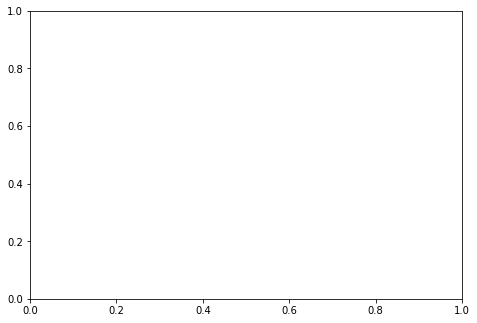

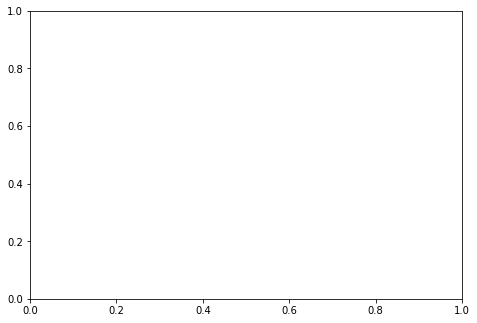

In [3]:
ax = fig.add_axes([0, 0, 1, 1])
fig

Ax-in boş olması bizə elə də yararlı deyil. Bu ax-i daha canlı hala gətirmək üçün hər hansı bir funksiyanın qrafikini çəkə bilərik. Nümunə olaraq  $ y = x^2 $ funksiyasının qrafikini çəkəcəm. Bunun üçün edəcəyim şey əvvəlcə $x$ və müvafiq $y$ qiymətlərindən ibarət olan arraylər yaratmaqdı.

In [4]:
xs = np.linspace(1, 10, 4)
ys = xs ** 2

print(xs)
print(ys)

[ 1.  4.  7. 10.]
[  1.  16.  49. 100.]
[ 1.  4.  7. 10.]
[  1.  16.  49. 100.]


İndi isə **ax** obyektinin **plot** metodundan istifadə edərək **xs** və **ys** arraylərini qrafda göstərə bilərəm.

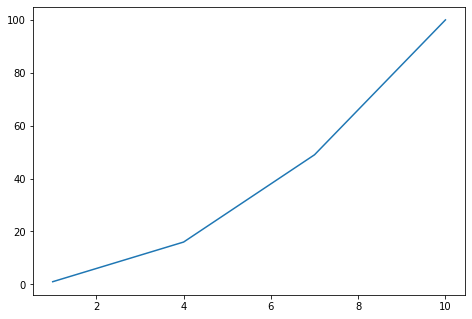

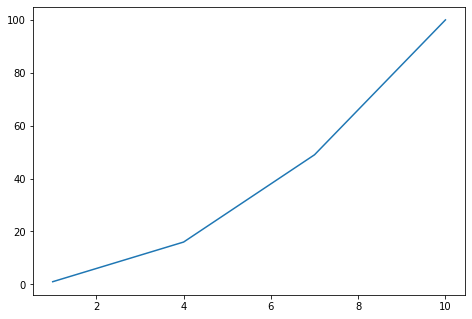

In [5]:
ax.plot(xs, ys)
fig

Ax-imizdə qrafımızı çəkdik. Lakin görürsünüz ki, qraf elə də gözəl görünmür. Bunun səbəbi odur ki, *matplotlib*də sadəcə verdiyimiz qiymətlərə uyğun nöqtələr birləşdirilir. Yəni, qrafda koordinatları (1, 1), (4, 16), (7, 49) və (10, 100) olan nöqtələr düz xəttlə birləşdirilib, və ona görə də funksiyanın qrafiki gözəl görünmür. Bu problemi aradan qaldırmaq üçün və daha dəqiq qrafik çəkmək üçün **np.linspace** funksiyası ilə array yaradarkən ora daha çox sayda ədəd yerləşdirə bilərik. Məsələn:

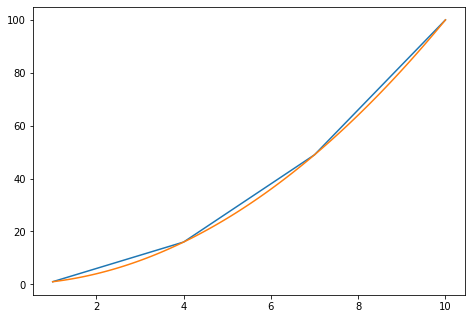

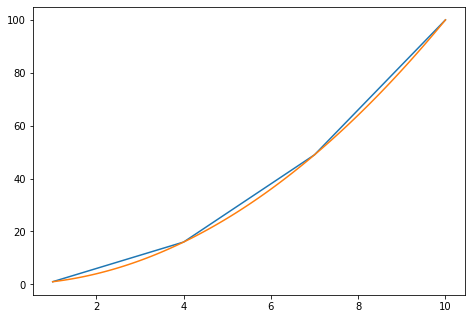

In [6]:
xs = np.linspace(1, 10, 100)
ys = xs ** 2

ax.plot(xs, ys)
fig

İndi problemi qismən aradan qaldırdıq: çəkdiyimiz xətt $ y = x^2 $ funksiyasının qrafikinə daha çox oxşayır. Lakin, bundan qabaq çəkdiyimiz xətt hələ də qrafikdədir. Bunun qarşısını almaq üçün sadəcə **fig** obyektini yenidən yarada bilərik. Problemin yaranma səbəbi o idi ki, biz ardıcıl olaraq eyni ax-ə iki qrafik çəkirdik.

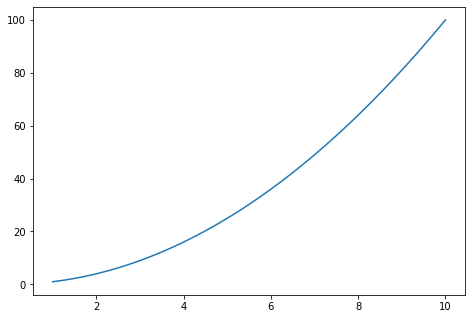

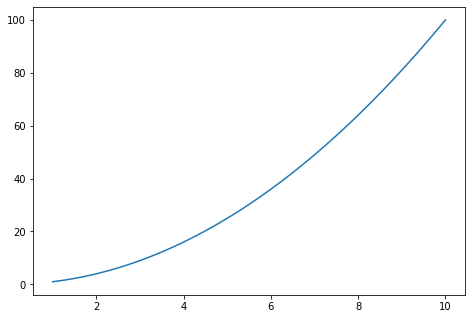

In [7]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

xs = np.linspace(1, 10, 100)
ys = xs ** 2

ax.plot(xs, ys)

Və görürsünüz ki, qrafiki görmək üçün əlavə olaraq **fig** yazmalı olmadım. Bunun da səbəbi Jupyter Notebookda Matplotlib modülünün *inline* olaraq işləməsidi.

Bütün iş amma qrafiki çəkməklə bitmir. Ax obyektimizin görünüşünü dəyişmək üçün istifadə edə biləcəyimiz bir neçə parametr var. Bunlar:
* **ax.set_xlim**, **ax.set_ylim** - bu methodların köməyilə x və y oxlarının başlanğıc və sonunu dəyişə bilərik.
* **ax.set_xlabel**, **ax.set_ylabel** - bu methodların köməyilə x və y oxlarına ad verə bilərik
* **ax.set_title** - bu methodun köməyilə ax obyektimizə başlıq yaza bilərik.
* **ax.grid** - bu methodun köməyilə **grid** görünüşünü aça bilərik.
* **ax.legend** - bu methodun köməyilə çəkdiyimiz qrafiklərin **label** parametri varsa, onları göstərə bilərik.

Bundan əlavə, **ax.plot** funksiyası aşağıdakı parametrləri götürə bilir:
* **label** - bu parametrə verilən qiymət **legend** bölməsində göstərilir
* **color** - bu parametrə verilən qiymət çəkilən qrafikin rəngini müəyyən edir (qiymət olaraq həm rəngin ingiliscə adını, həm də hex kodunu verə bilərik)
* **alpha** - bu parametrə verilən qiymət çəkilən qrafikin transparentlik dərəcəsini müəyyən edir
* **marker** - bu parametrə verilən qiymət qrafikdə birləşdirilən nöqtələrə çəkilən markerin növünü bildirir (qiymət olaraq "o", "s", "$*$", "^", "\_", və s. verə bilərik. Daha çoxunu görmək üçün documentationa nəzər sala bilərsiniz)
* **markeredgecolor** - bu parametrə verilən qiymət markerlərin kənarlarının rəngini müəyyən edir
* **markeredgewidth** - bu parametrə verilən qiymət markerlərin kənarlarının qalınlığını müəyyən edir
* **markerfacecolor** - bu parametrə verilən qiymət markerlərin rəngini müəyyən edir
* **markersize** - bu parametrə verilən qiymət markerlərin ölçüsünü müəyyən edir
* **linestyle** - bu parametrə verilən qiymət nöqtələri birləşdirən xəttlərin stilini müəyyən edir (qiymət olaraq "-", "--", "-.", ":", və s. verə bilərik. Daha çoxunu görmək üçün documentationa nəzər sala bilərsiniz)
* **linewidth** - bu parametrə verilən qiymət nöqtələri birləşdirən xəttlərin qalınlığını müəyyən edir
* **dashes** - bu parametrə verilən list nöqtələri birləşdirən xəttin qırıq-qırıqlığını özəlləşdirməyə kömək edir. Məsələn, bu parametrə [10, 3, 5, 8] listi verilsə (listin elementləri cüt sayda olmalıdı), listin elementləri növbə ilə xəttlərin və boşluqların uzunluğunu bildirəcək. Yəni ki, 10 uzunluqlu xətt, 3 uzunluqlu boşluq, 5 uzunluqlu xətt, 8 uzunluqlu boşluq. Bu **pattern** bütün qrafik boyu təkrarlanacaq.

Təbii ki, yazdıqlarım hərşeyi əhatə etmir, lakin bunlar ən çox işləndiyini gördüyüm methodlar və parametrlərdir. Bunların hamısını eyni qrafikdə göstərmək mümkün olmasa da, aşağıdakı qrafikdə bəzilərini göstərməyə çalışmışam.

Text(0.5, 1.0, 'Qrafik')

Text(0.5, 1.0, 'Qrafik')

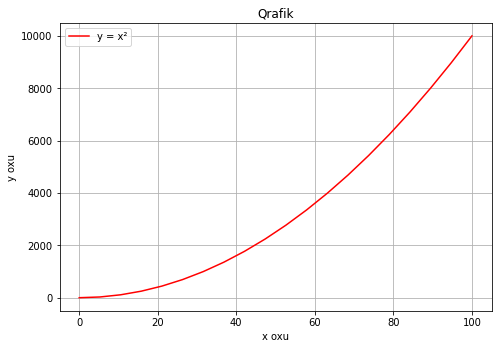

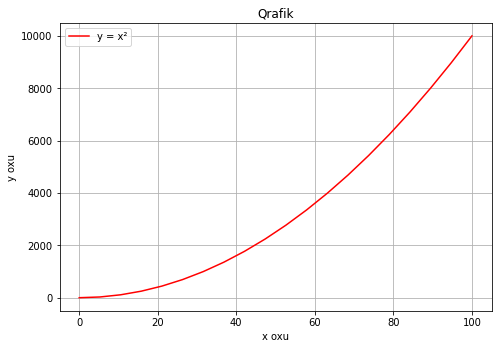

In [8]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

xs = np.linspace(0, 100, 20)
ys = xs ** 2

ax.plot(xs, ys, label="y = x²", color="red")
ax.legend()
ax.grid()
ax.set_xlabel("x oxu")
ax.set_ylabel("y oxu")
ax.set_title("Qrafik")

## Qrafik üzərində qrafik

Bəzən ola bilər ki, birdən çox qrafiki eyni ax-də vizuallaşdırmaq lazım gəlsin. Bunu etmək olduqca sadədir - ax obyektimizin plot methodunu ikinci dəfə çağırmaq kifayət edəcək.

Text(0.5, 1.0, 'Qrafik')

Text(0.5, 1.0, 'Qrafik')

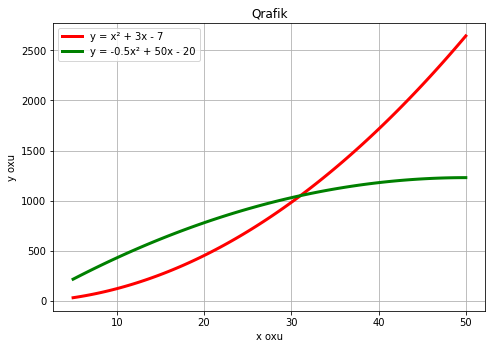

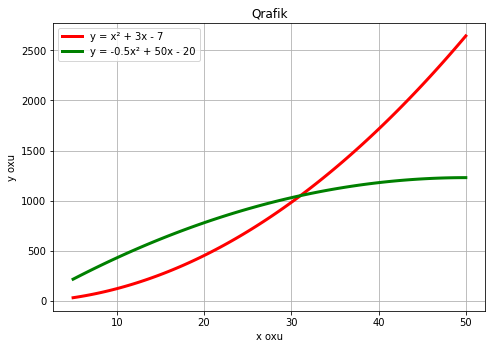

In [9]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

xs = np.linspace(5, 50, 100)
ys1 = xs ** 2 + 3 * xs - 7
ys2 = -0.5 * xs ** 2 + 50 * xs - 20

ax.plot(xs, ys1, color="red", linewidth=3, label="y = x² + 3x - 7")
ax.plot(xs, ys2, color="green", linewidth=3, label="y = -0.5x² + 50x - 20")

ax.legend()
ax.grid()
ax.set_xlabel("x oxu")
ax.set_ylabel("y oxu")
ax.set_title("Qrafik")

## Figure obyektinin parametrləri

Biz **plt.figure** funksiyası ilə figure obyektimizi yaradarkən ora əlavə olaraq iki parametr də verə bilərik. Bunlardan birincisi **figsize**, ikincisi isə **dpi** parametridir.

**figsize** parametri qiymət olaraq iki elementdən ibarət *tuple* götürür. Bu tuple-dakı qiymətlər figure obyektinin ölçüləri nisbətini bildirir.

**dpi** parametrinə verilən qiymət figure obyektində çəkilən qrafiklərin çap keyfiyyətini göstərir. Adətən kağıza çap ediləcək və ya təqdimatda böyük ekranda nümayiş etdiriləcək qrafiklərin dpi (dots per inch) dəyərinin ən azı 300 olması tələb edilir.

Aşağıdakı nümunədə ölçü nisbəti 16:9 və dpi dəyəri 300 olan boş bir figure yaratmışam.
Qeyd: Ax yaratmağımın və qrafik çəkməyimin səbəbi sadəcə ölçüləri və keyfiyyəti göstərmək üçündü.

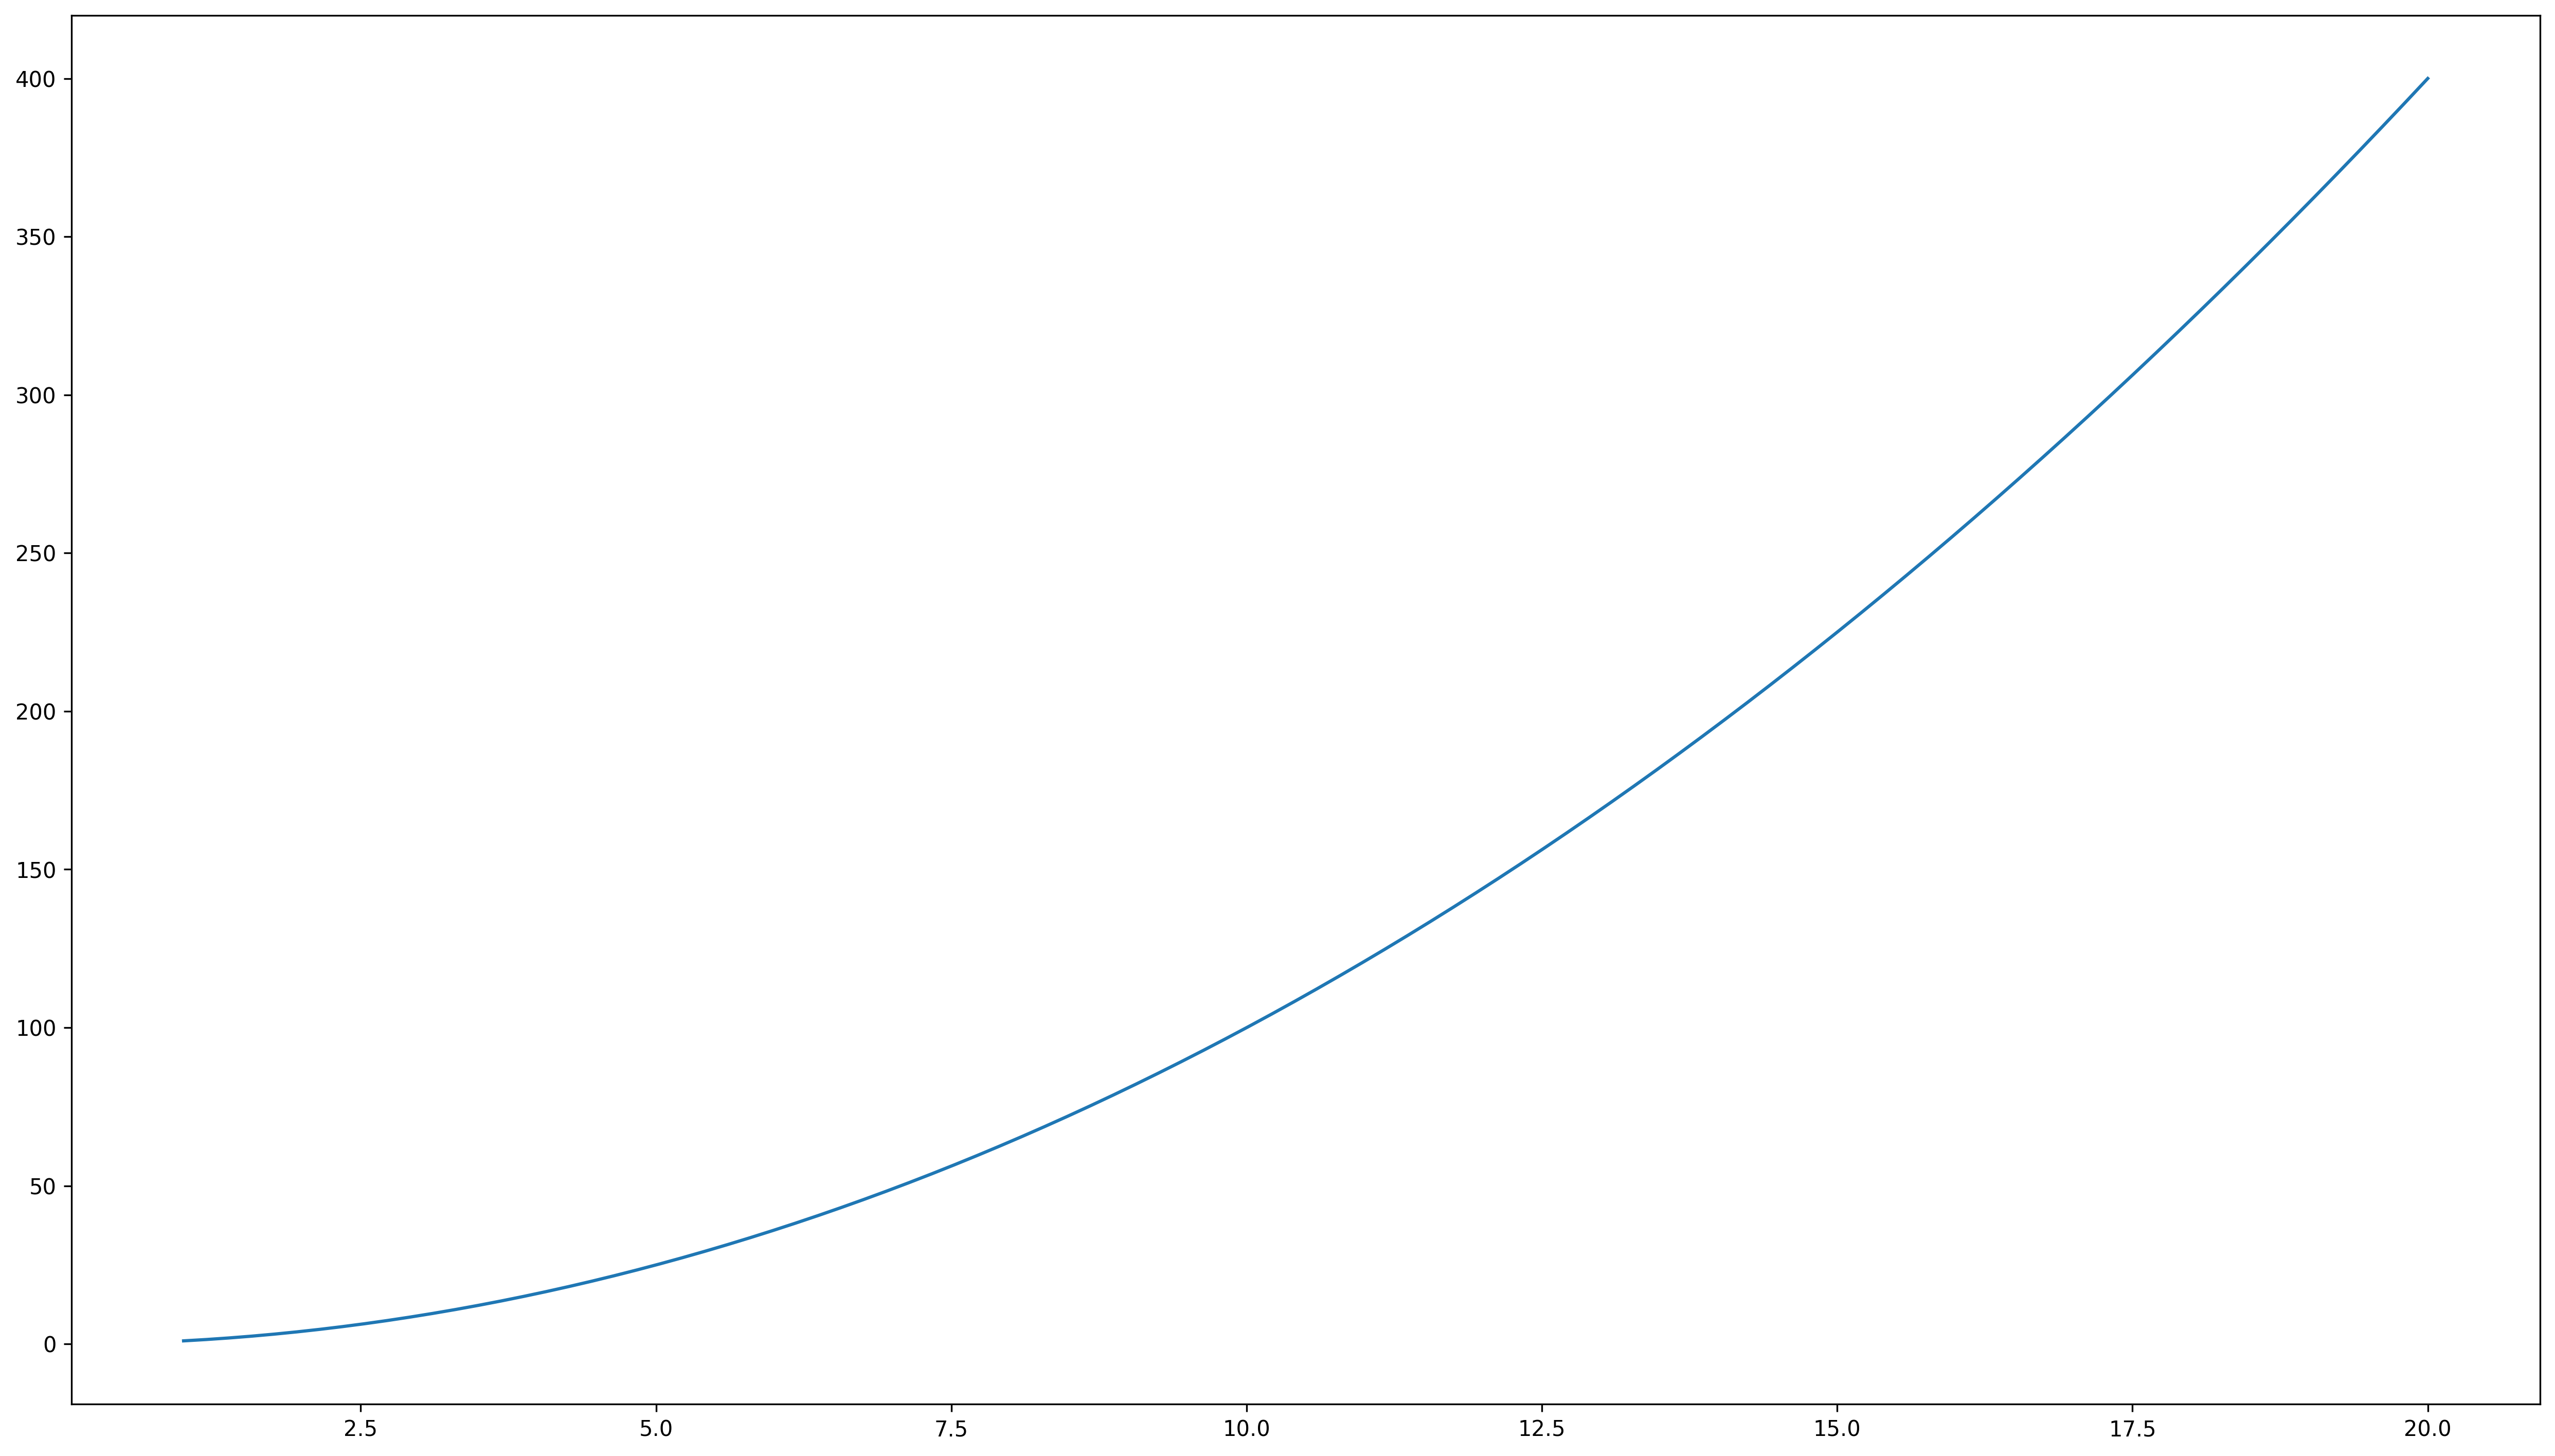

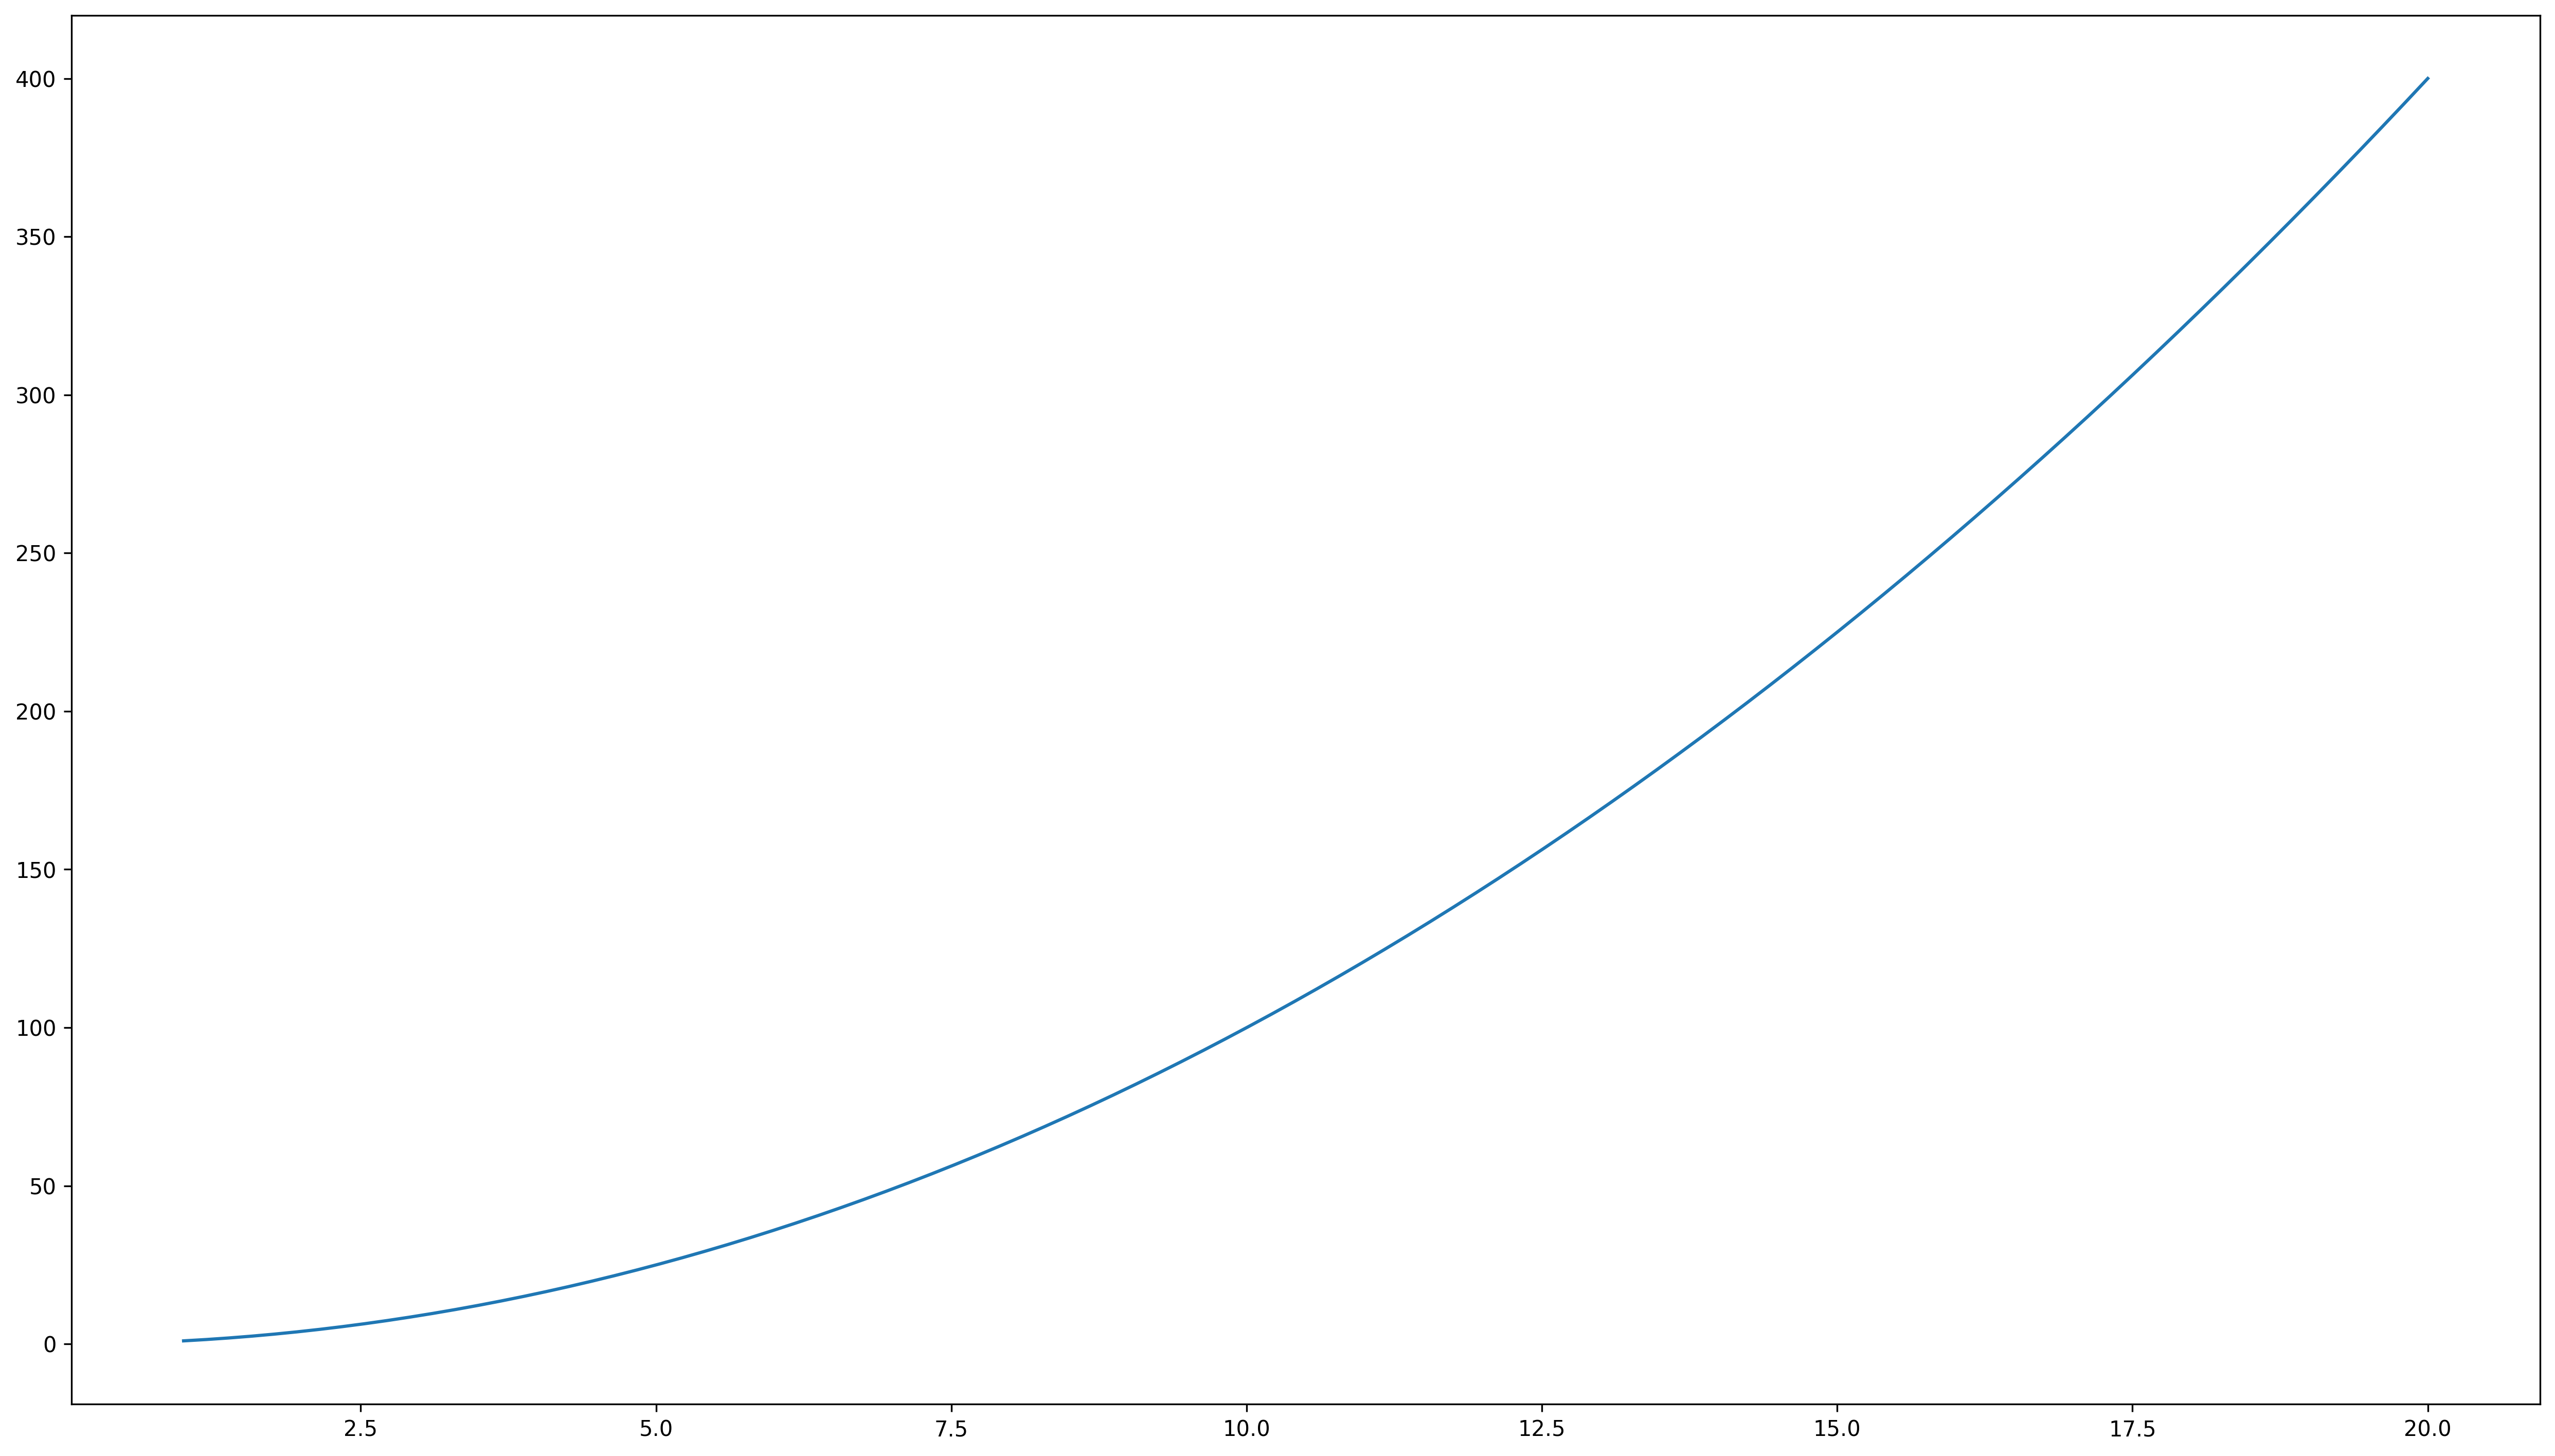

In [10]:
fig = plt.figure(figsize=(16, 9), dpi=300)

ax = fig.add_axes([0, 0, 1, 1])

xs = np.linspace(1, 20, 100)
ys = xs ** 2

ax.plot(xs, ys)

## Ax üzərində ax

Eyni bir figure daxilində birdən çox ax yaratmaq mümkündür. Sadəcə olaraq ikinci bir ax obyekti yaradıb orada qrafik çəkəcəyik. Aşağıdakı nümunədə əvvəlki iki nümunədəki kodu birləşdirib əlavə olaraq ikinci kiçik bir ax yaratmışam.

Həmçinin əlavə olaraq mətnlərin ölçülərini böyütmək üçün **legend**, **set_xlabel**, **set_ylabel**, **set_title** methodlarına əlavə **fontsize** parametri, və **tick_params** adlı methoda **labelsize** parametri vermişəm.

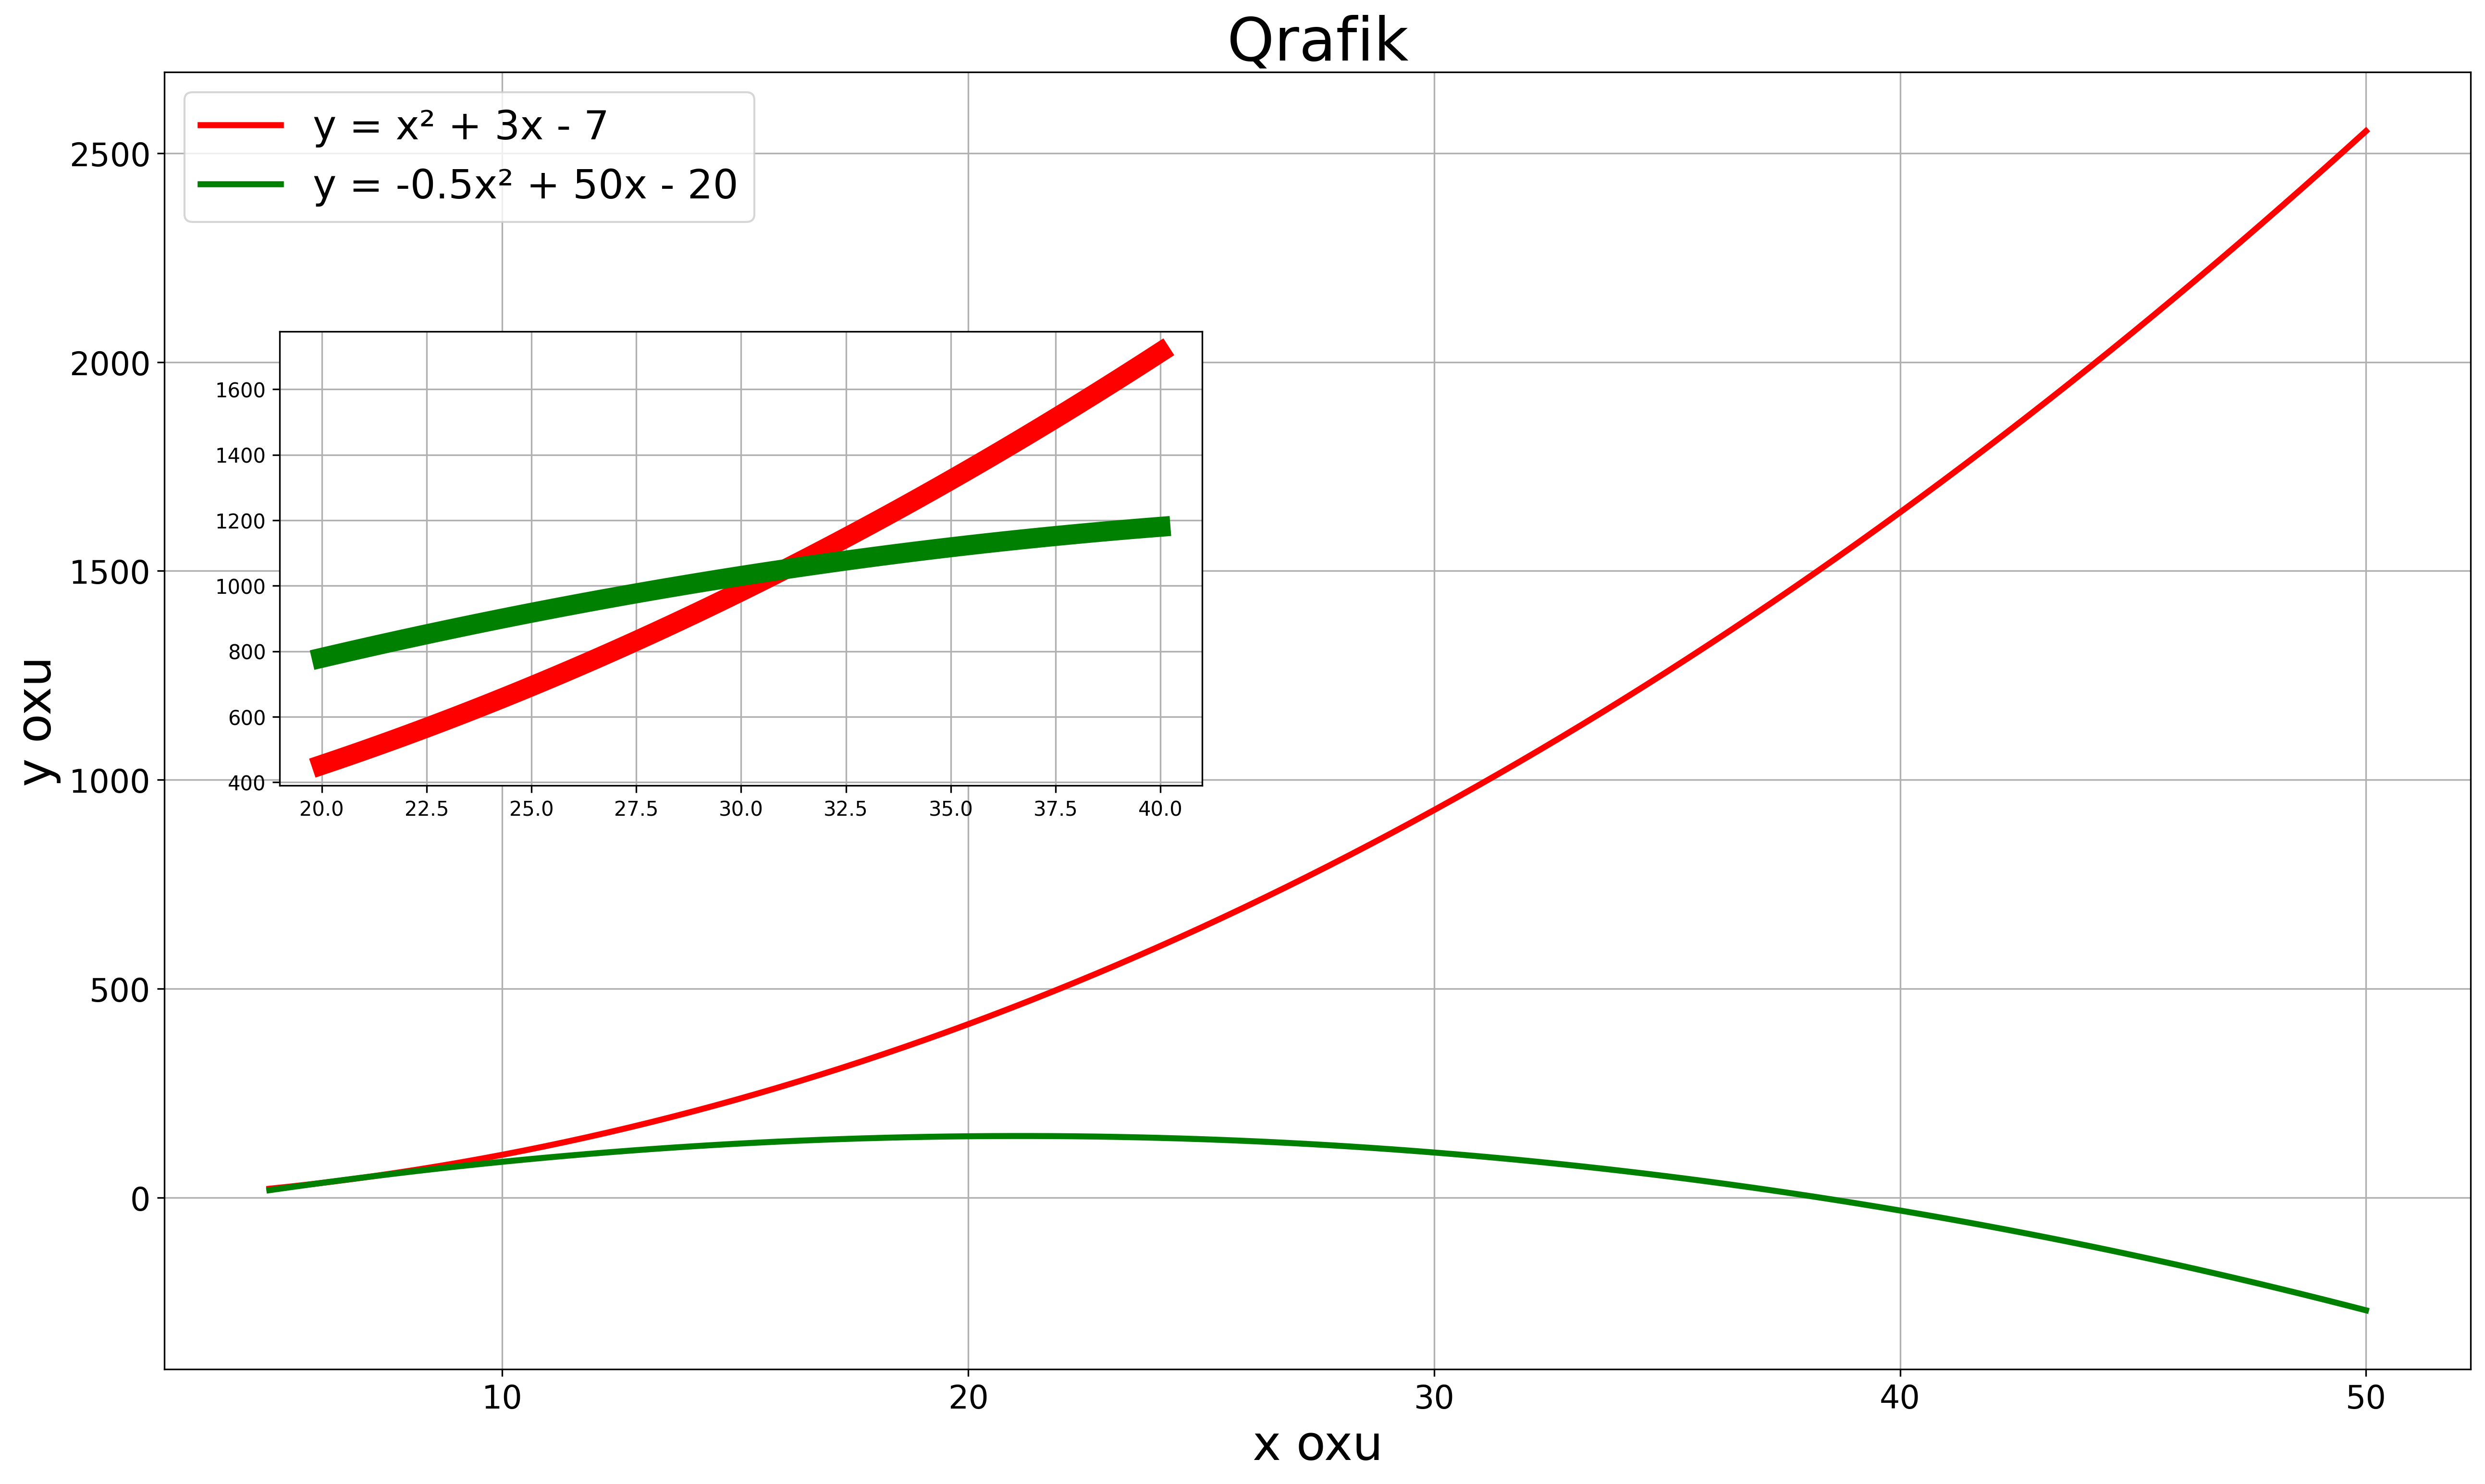

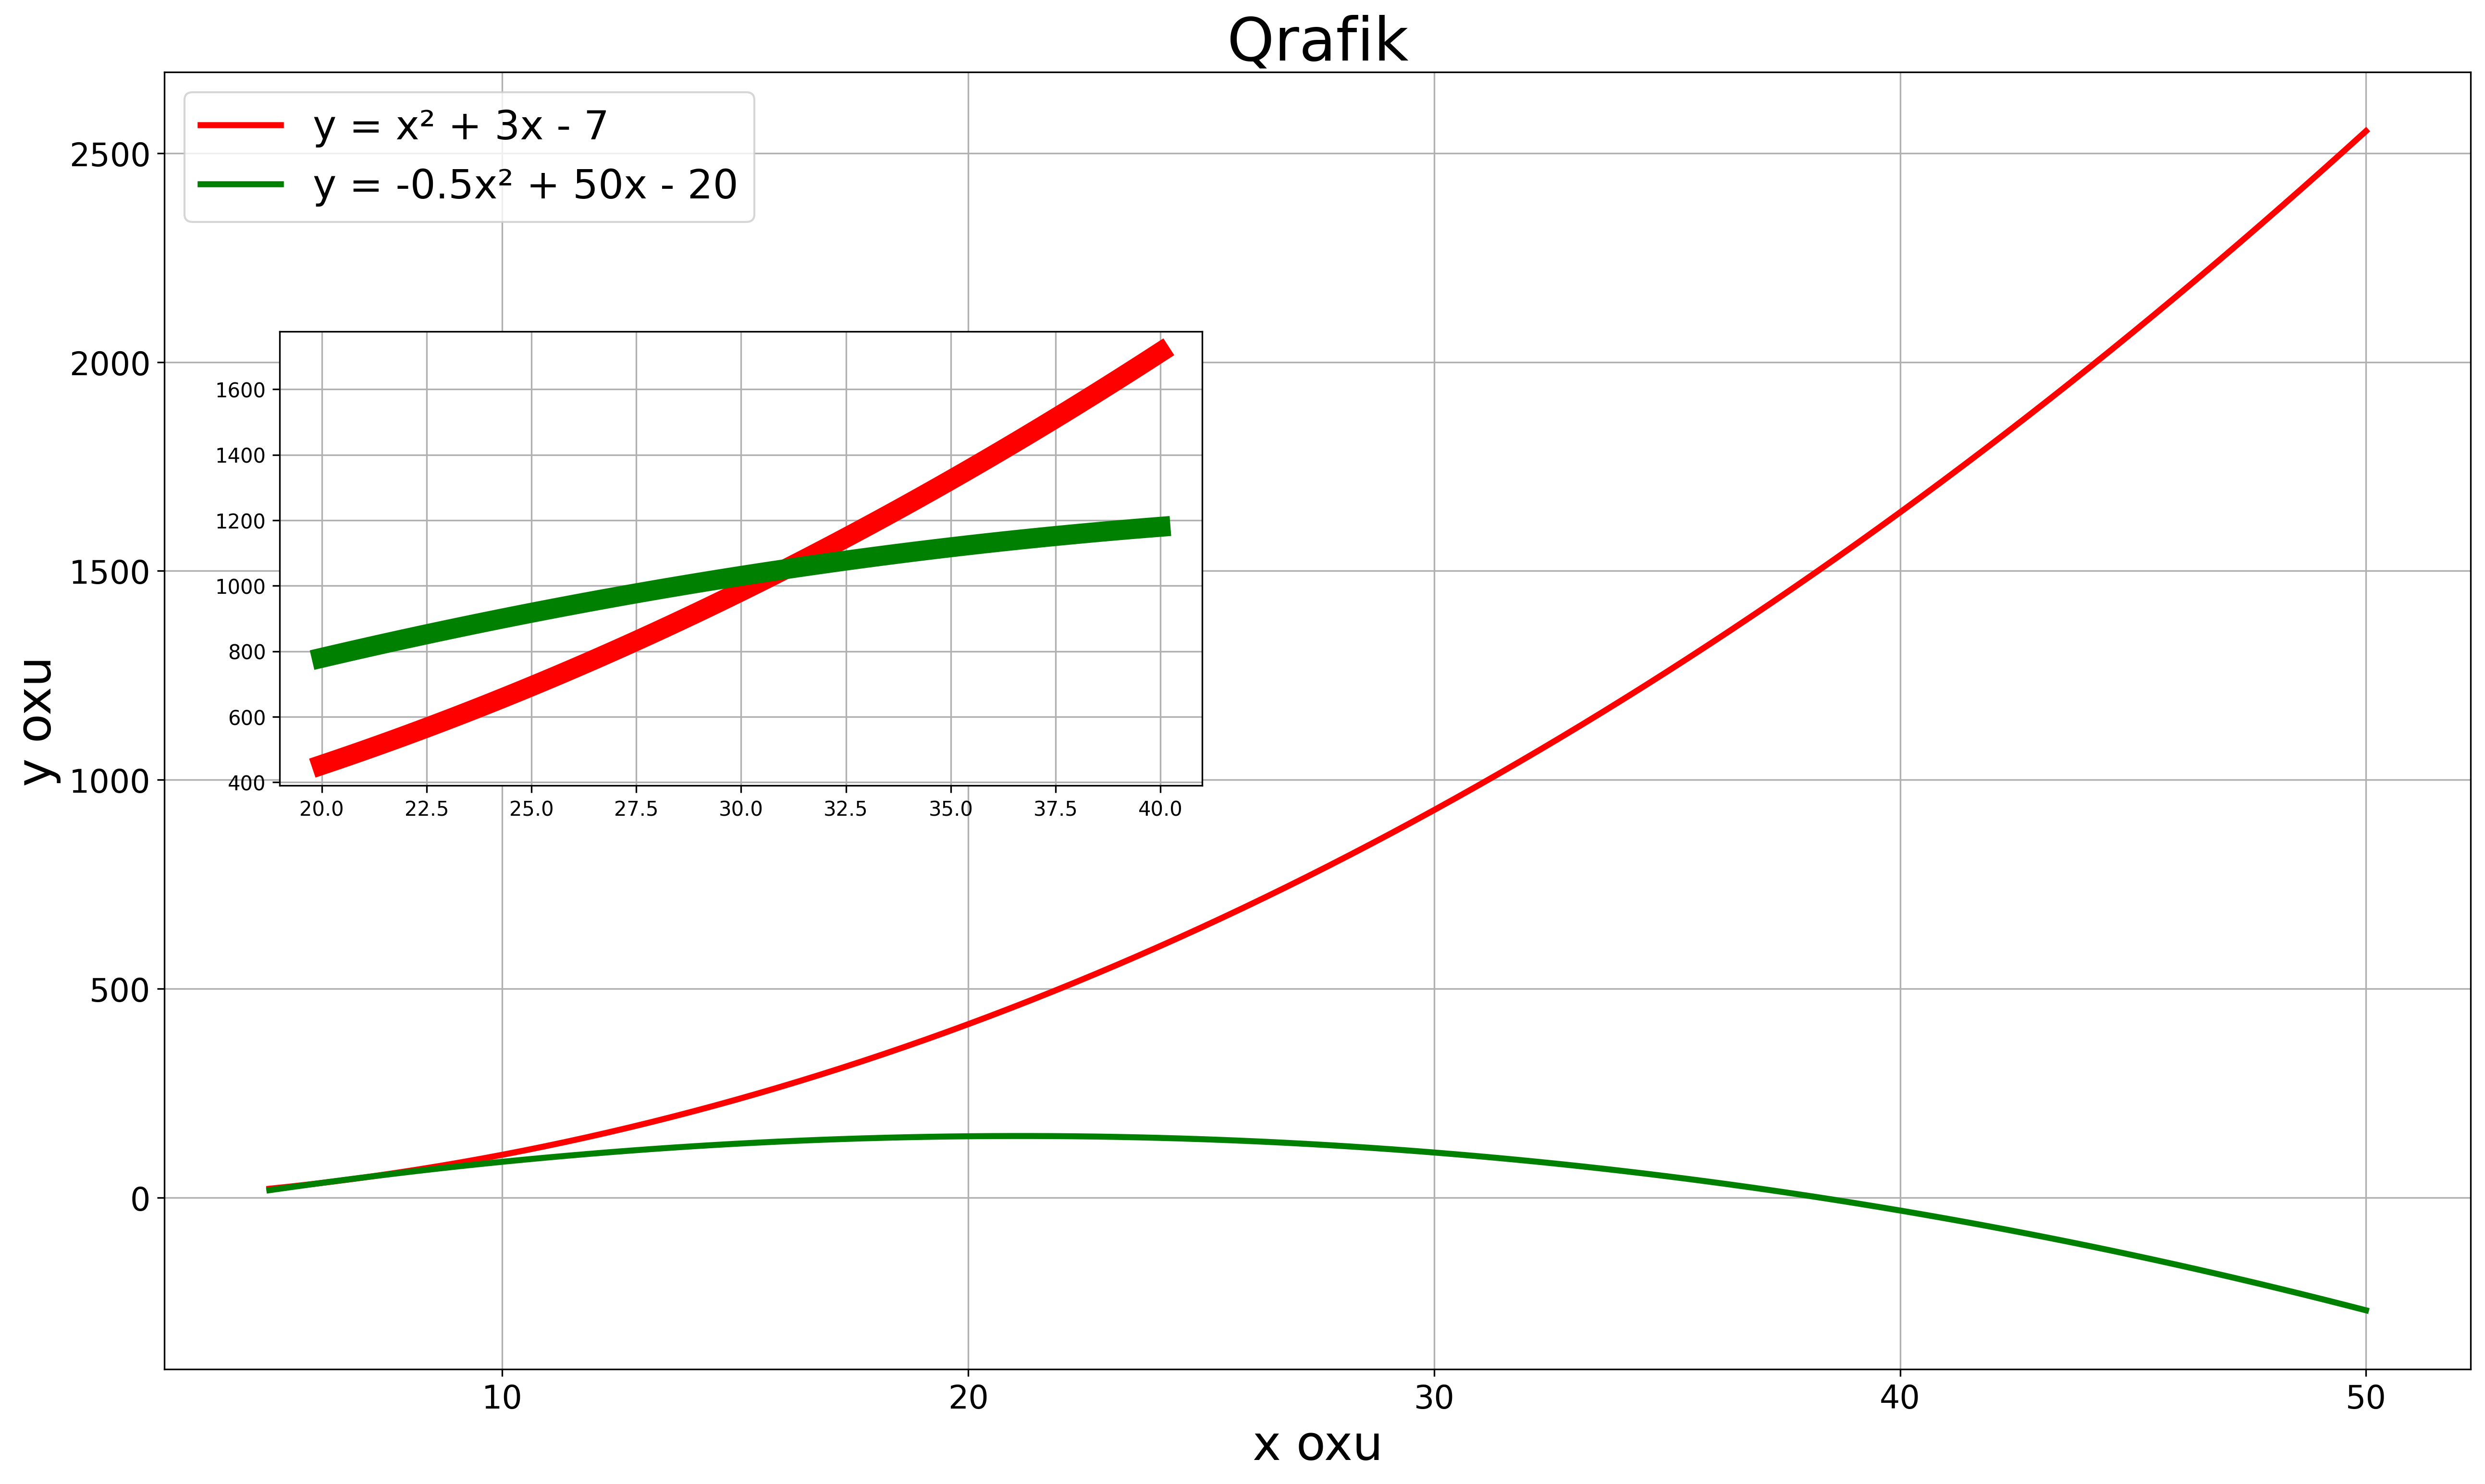

In [11]:
fig = plt.figure(figsize=(16, 9), dpi=300)

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.05, 0.45, 0.4, 0.35])

xs1 = np.linspace(5, 50, 100)
ys1_1 = xs1 ** 2 + 3 * xs - 7
ys1_2 = -0.5 * xs1 ** 2 + 50 * xs - 20

xs2 = np.linspace(20, 40, 100)
ys2_1 = xs2 ** 2 + 3 * xs2 - 7
ys2_2 = -0.5 * xs2 ** 2 + 50 * xs2 - 20 

ax1.plot(xs1, ys1_1, color="red", linewidth=3, label="y = x² + 3x - 7")
ax1.plot(xs1, ys1_2, color="green", linewidth=3, label="y = -0.5x² + 50x - 20")
ax1.legend(fontsize=20)
ax1.grid()
ax1.set_xlabel("x oxu", fontsize=24)
ax1.set_ylabel("y oxu", fontsize=24)
ax1.set_title("Qrafik", fontsize=30)
ax1.tick_params(labelsize=16)

ax2.plot(xs2, ys2_1, color="red", linewidth=10)
ax2.plot(xs2, ys2_2, color="green", linewidth=10)
ax2.grid()

## Subplot

Təbii ki, səliqəli bir şəkildə ax üzərində başqa ax-lər yaratmaq olar. Lakin ax-lərdə vizuallaşdırılmış məlumatların biri-birilə sıx əlaqəsi yoxdursa, onları üst-üstə vizuallaşdırmaq həm qrafiki səliqəsiz edir, həm də vizuallaşdırılmış məlumatın anlaşılmasını çətinləşdirir. Bunun qarşısını almaq üçün **subplot** anlayışı mövcuddu. Subplot dedikdə bir figure üzərində yerləşən çoxlu ax-lərdən biri nəzərdə tutulur. Məsələn, iki subplotdan ibarət figure yaratmaq istəsək, aşağıdakı kimi bir kod yazarıq:

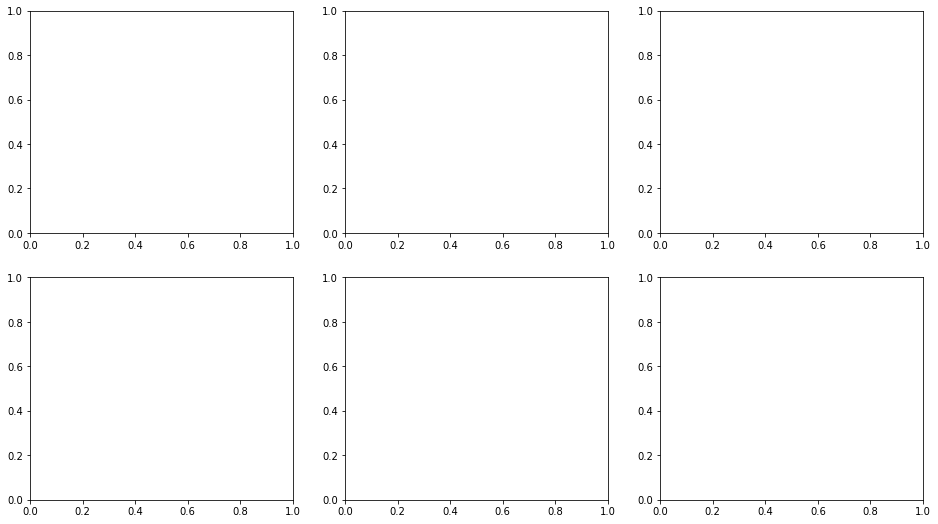

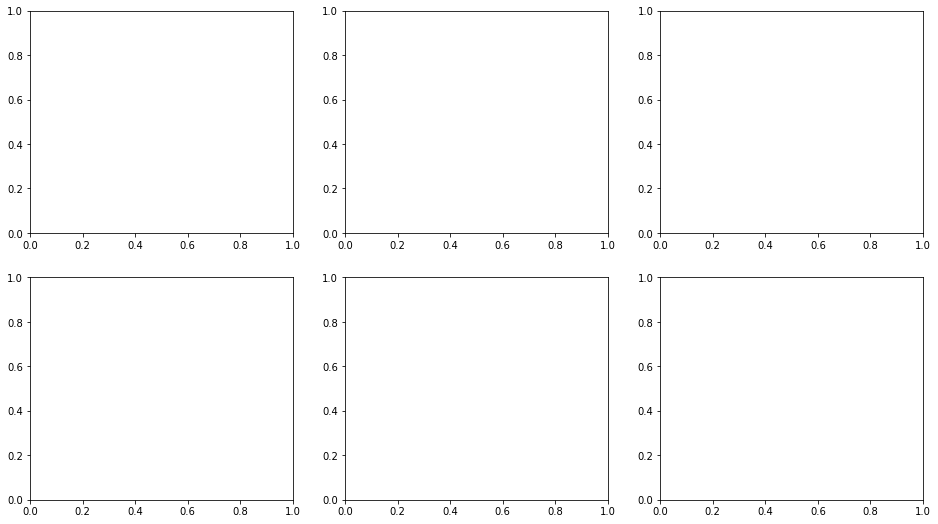

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9))

Yuxarıda yazdığım sətir gördüyünüz kimi, 2 sətir və 3 sütündan ibarət figure yaratdı. İndi isə istədiyimiz ax-in üzərində istədiyimiz funksiyanın qrafikini çəkə bilərik. Və ən yaxşı tərəfi də odur ki, bunların hamısını **for loopu** ilə səliqəli şəkildə etmək mümkündü. Nümunə üçün hər bir $ s_i $ subplota $ y = x^i $ funksiyasının qrafikini çəkəcəm.

Qeyd: **axes** obyekti bu halda *ikiölçülü numpy array*dir. Onun elementlərinin üzərindən iterasiya etmək üçün **nested for loop** lazım olacaq. Həmçinin hal-hazırda üzərində olduğumuz qrafikin neçənci qrafik olduğunu müəyyən etmək üçün $ index = i * len(axes[i]) + j $ kimi bir hesablama tətbiq etmişəm.

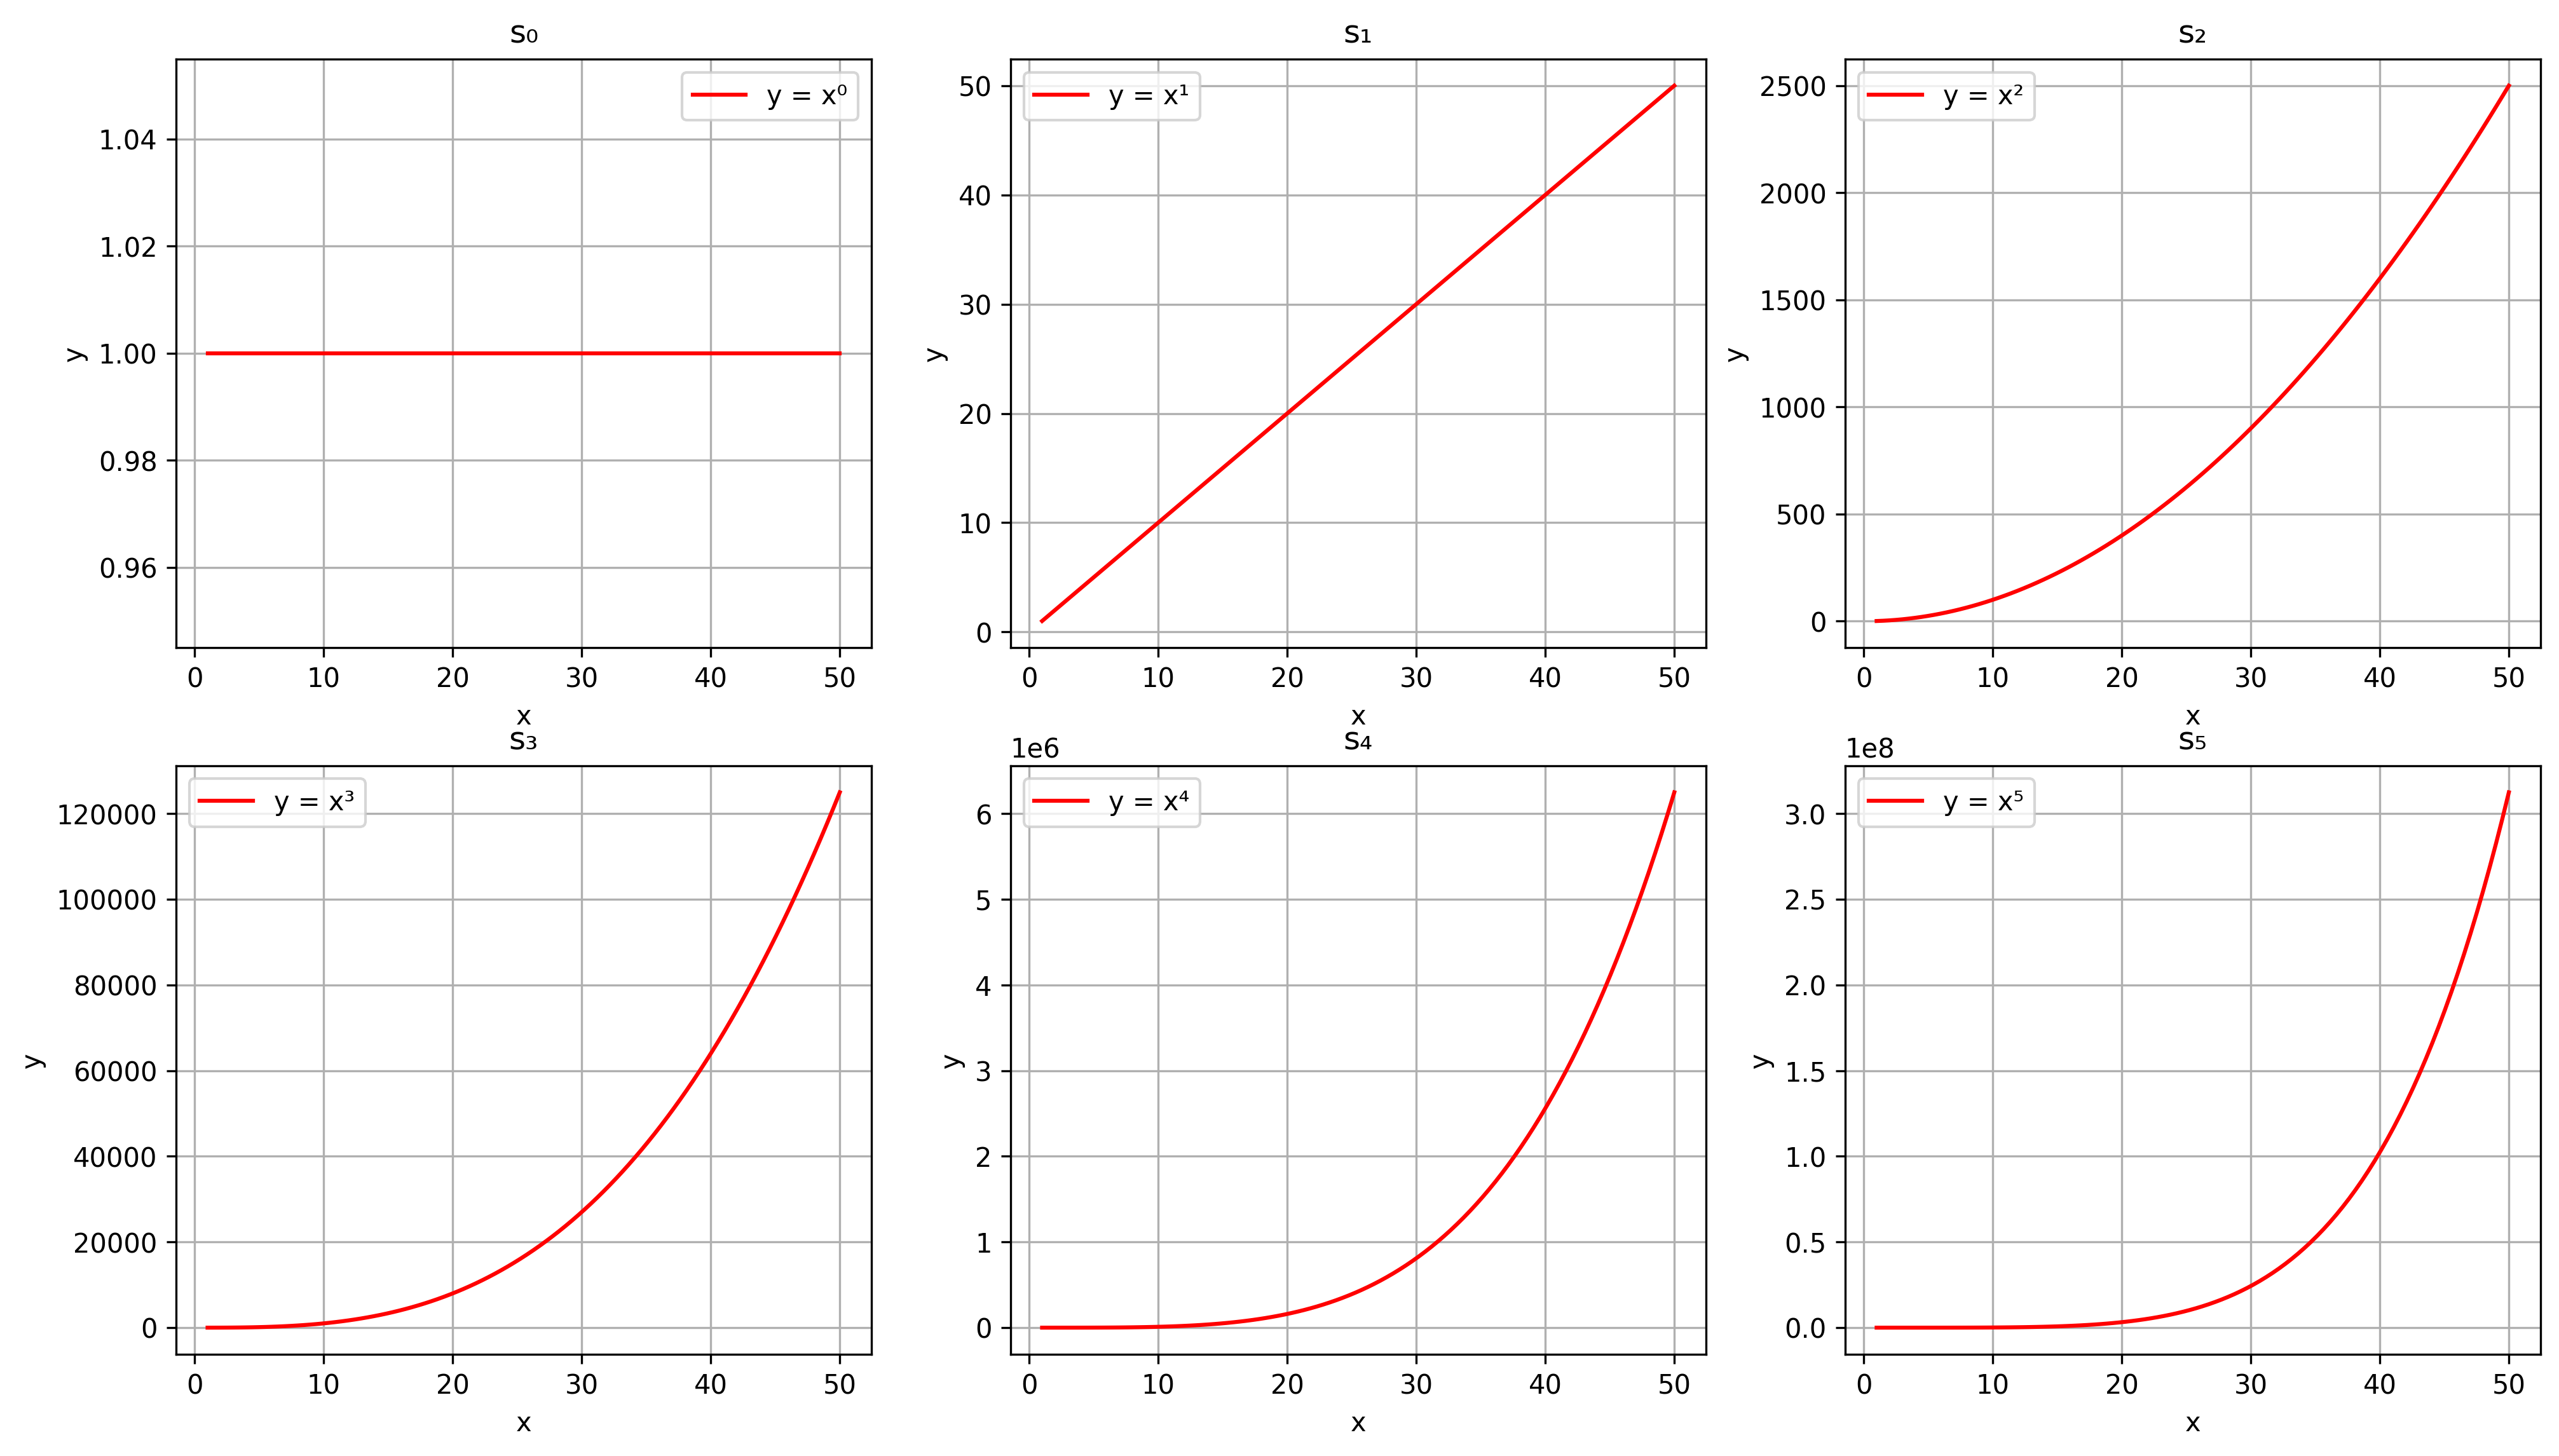

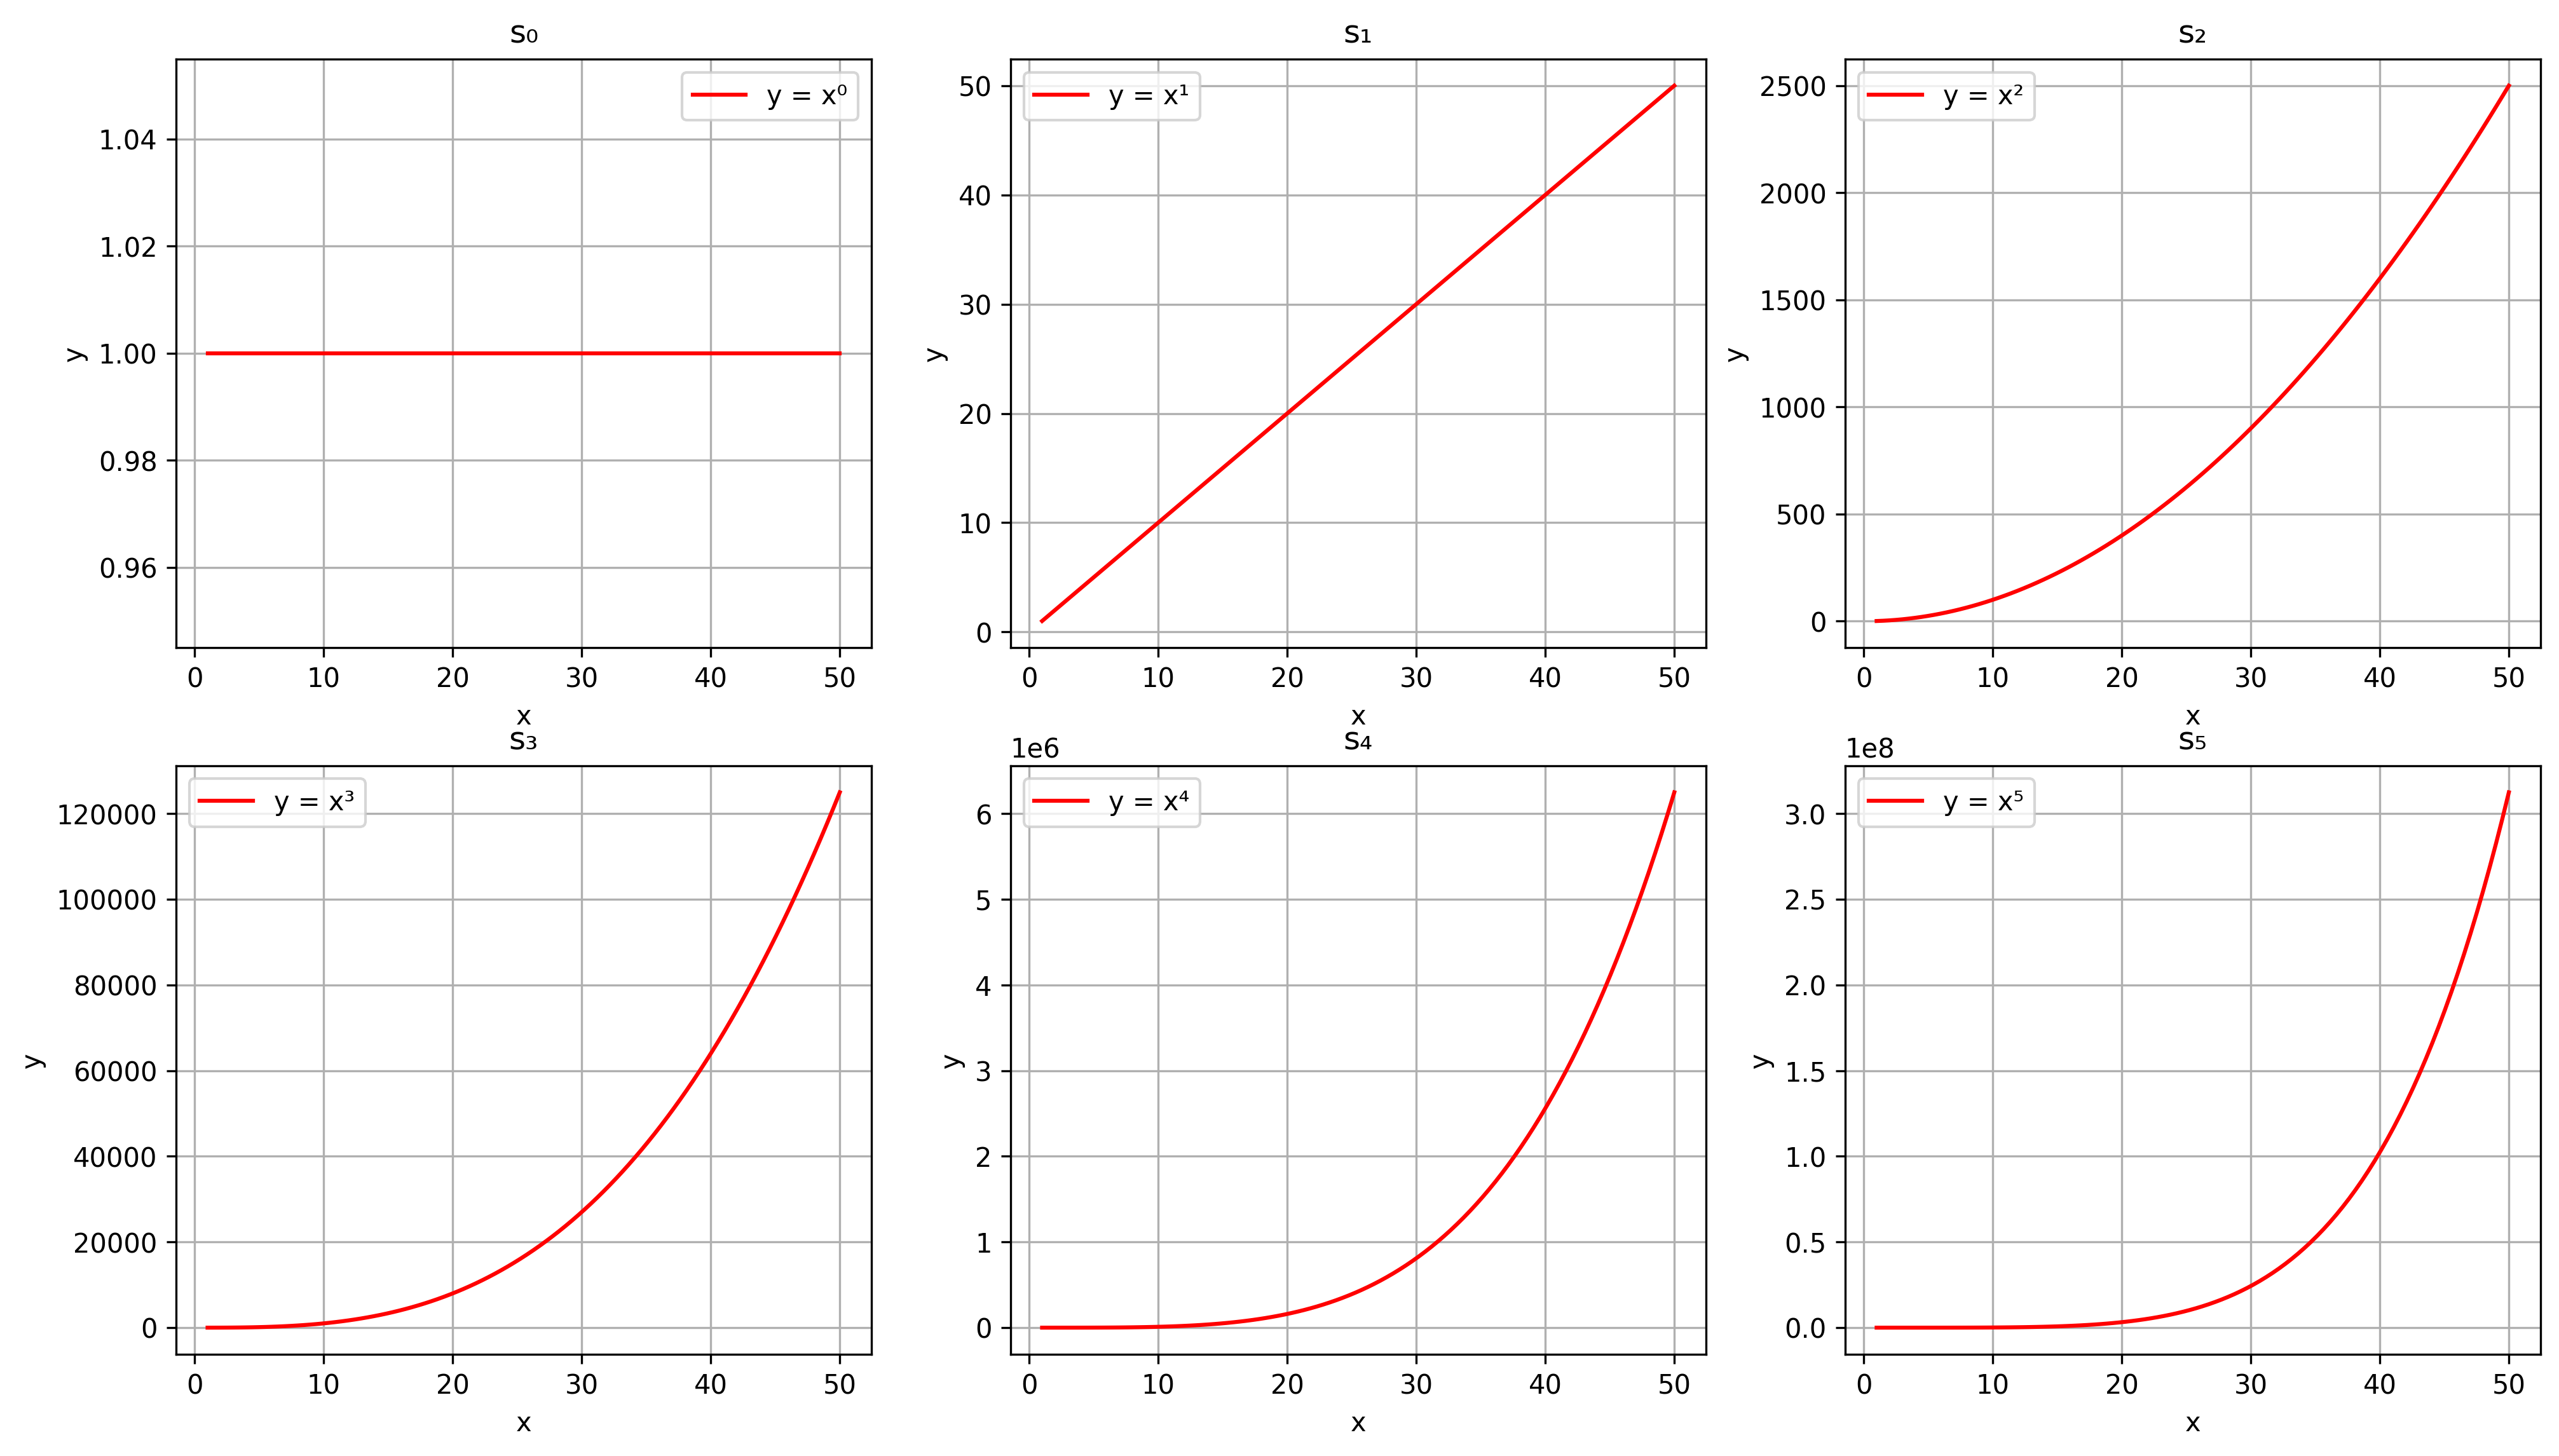

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), dpi=300)
superscripts = ['⁰', '¹', '²', '³', '⁴', '⁵', '⁶', '⁷', '⁸', '⁹']
sub__scripts = ['₀', '₁', '₂', '₃', '₄', '₅', '₆', '₇', '₈', '₉']

xs = np.linspace(1, 50, 100)

for i in range(len(axes)):
    for j in range(len(axes[i])):
        index = i * len(axes[i]) + j
        ys = xs ** index
        axes[i][j].plot(xs, ys, color="red", label=f"y = x{superscripts[index]}")
        axes[i][j].grid()
        axes[i][j].legend()
        axes[i][j].set_xlabel("x")
        axes[i][j].set_ylabel("y")
        axes[i][j].set_title(f"s{sub__scripts[index]}")

## Müxtəlif növ qrafiklər

İndiyə qədər müzakirə etdiyimiz bütün qrafiklər **ax.plot** methodu ilə çəkilən qrafiklər idi. Bu qrafiklər əsasən bizim verdiyimiz müvafiq $x$ və $y$ nöqtələrini birləşdirərək çəkilirdi. Matplotlib modülü bu tip qrafiklərlə limitli deyil. Bizim istifadə edə biləcəyimiz bir neçə əlavə qrafiklər də mövcuddur. Bu qrafiklər barədə aşağıda ümumi məlumat vermişəm. Hər hansı biri haqqında əlavə incəlikləri öyrənmək istəsəniz documentationa nəzər sala bilərsiniz.

#### Line chart

Bu qrafik ən sadə qrafikdir. Bizim verdiyimiz məlumat nöqtələri koordinat sistemində düz xəttlərlə birləşdirilir.

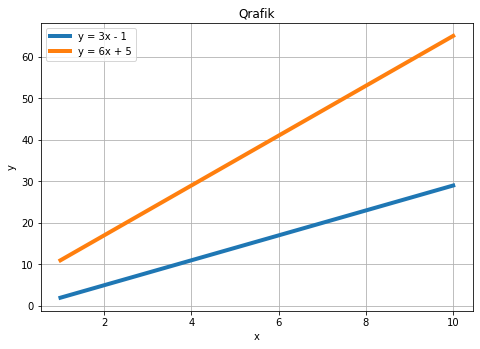

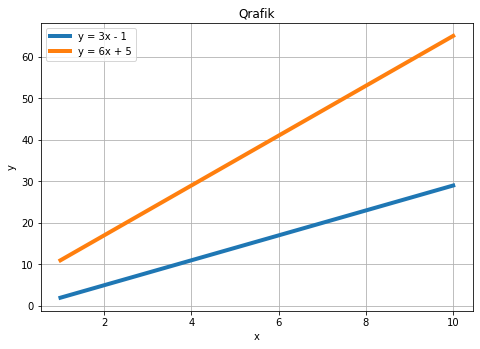

In [14]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

xs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

func1 = lambda x: 3 * x - 1
func2 = lambda x: 6 * x + 5

ys1 = func1(xs)
ys2 = func2(xs)

ax.plot(xs, ys1, label="y = 3x - 1", lw=4)
ax.plot(xs, ys2, label="y = 6x + 5", lw=4)

ax.legend()
ax.set_title("Qrafik")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()

#### Scatter

Matplotlib modülündə istifadə edilən klassik və fundamental qrafiklədən biri *scatterplot* qrafikidir. Bu qrafik adi öyrəndiyimiz qrafikə çox oxşayır, sadəcə tək fərq odur ki, nöqtələr xəttlərlə birləşdirilmir.

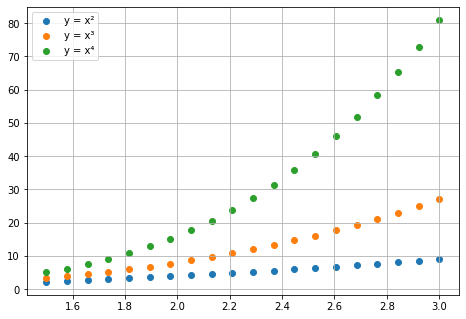

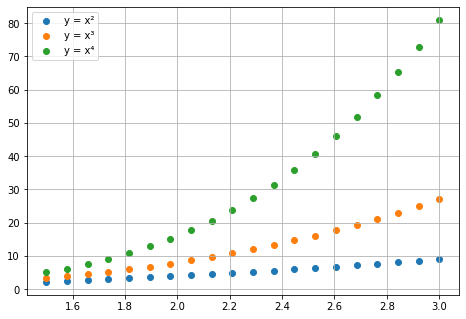

In [15]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

xs = np.linspace(1.5, 3, 20)

ax.scatter(xs, pow(xs, 2), label="y = x²")
ax.scatter(xs, pow(xs, 3), label="y = x³")
ax.scatter(xs, pow(xs, 4), label="y = x⁴")

ax.legend()
ax.grid()

#### Bar chart

Müqayisə olunan məlumatların sayı çox olduqda onları şaquli sütunlarla ifadə edərək vizuallaşdırmaq üçün bar chartdan istifadə etmək olar.

Text(0, 0.5, 'Gəlir')

Text(0, 0.5, 'Gəlir')

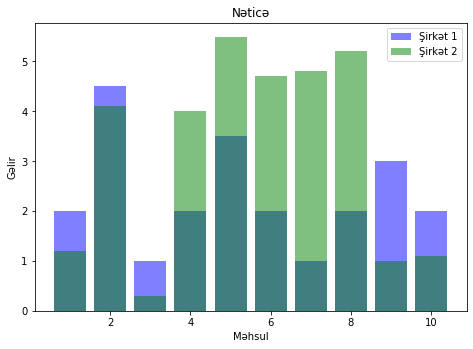

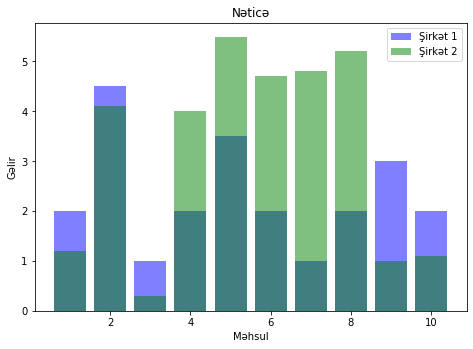

In [16]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ys1 = [2, 4.5, 1, 2, 3.5, 2, 1, 2, 3, 2]
ys2 = [1.2, 4.1, 0.3, 4, 5.5, 4.7, 4.8, 5.2, 1, 1.1]

ax.bar(xs, ys1, label="Şirkət 1", color="b", align="center", alpha=0.5)
ax.bar(xs, ys2, label="Şirkət 2", color="g", align="center", alpha=0.5)

ax.legend()
ax.set_title("Nəticə")
ax.set_xlabel("Məhsul")
ax.set_ylabel("Gəlir")

#### Histogram

Histogram vasitəsilə arraydə olan qiymətlərin hər birinin neçə dəfə mövcud olduğunu qruplaşdırmaq olar. Qrupların sayını **bins** parametri təyin edir.

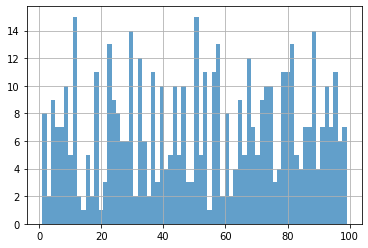

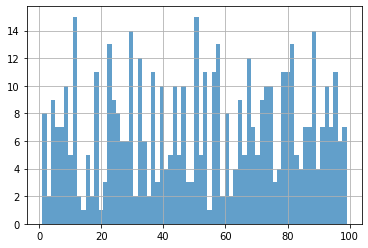

In [17]:
data = np.random.randint(1, 100, 500)


plt.hist(data, bins=70, alpha=0.7)
plt.grid()

#### Pie chart

Çox istifadə edilən qrafiklərdən biri də pie chartdır. Bu qrafik əsasən qrupların ümumi sayın hansı hissəsini təşkil etdiyini vizuallaşdırmaq üçün istifadə olunur.

Text(0.5, 1.0, 'Web Browser istifadəsi - 2018')

Text(0.5, 1.0, 'Web Browser istifadəsi - 2018')

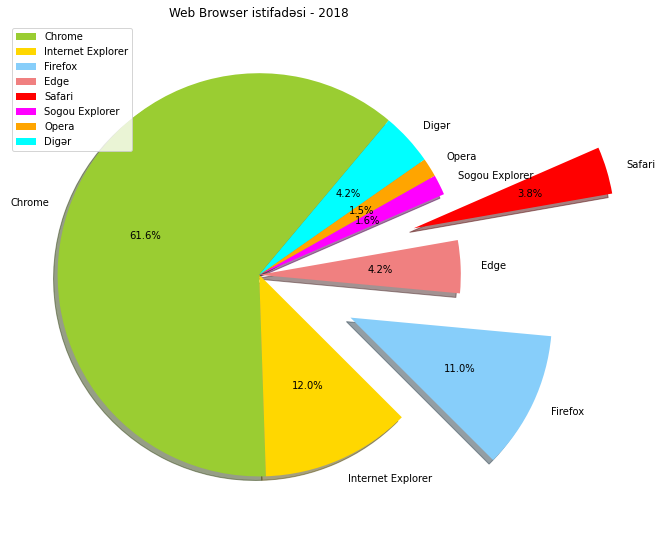

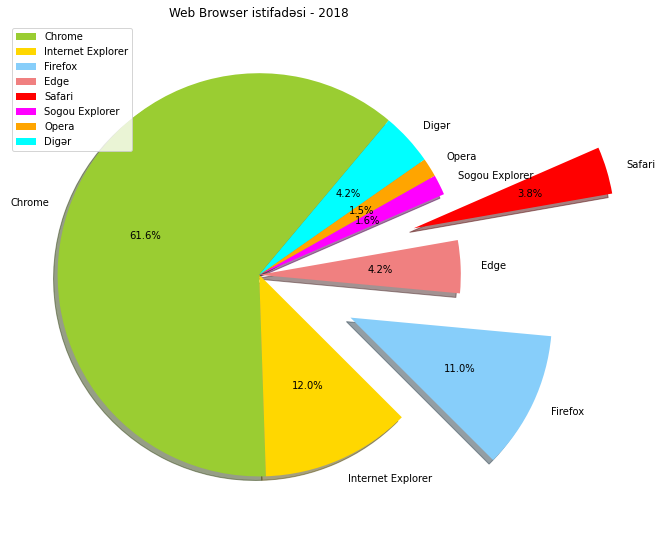

In [18]:
fig = plt.figure(figsize=(12, 7))

ax = fig.add_axes([0, 0, 1, 1])

labels = ["Chrome", "Internet Explorer", "Firefox", "Edge", "Safari", "Sogou Explorer", "Opera", "Digər"]
profit = [61.64, 11.98, 11.02, 4.23, 3.79, 1.63, 1.52, 4.19]

explode = [0, 0, 0.5, 0, 0.8, 0, 0, 0]
colors = ["yellowgreen", "gold", "lightskyblue", "lightcoral", "red", "magenta", "orange", "cyan"]

pie = ax.pie(profit, explode=explode, labels=labels, colors=colors, autopct="%.1f%%", shadow=True, startangle=50)

ax.legend()
ax.set_title("Web Browser istifadəsi - 2018")

## Əlavə məqamlar

Aşağıda matplotlib modülündə qrafik çəkərkən istifadə etdiyim bəzi əlavə funksionallıqları göstərmişəm.

#### set_xticks, set_xticklabels

Bu iki method çox zaman birgə işlənir. **set_xticks** methodu ilə x oxu üzərində hansı nöqtələrin qiymətlərinin göstəriləcəyini, **set_xticklabels** methodu ilə isə həmin qiymətlərə veriləcək adları müəyyən edə bilərik.

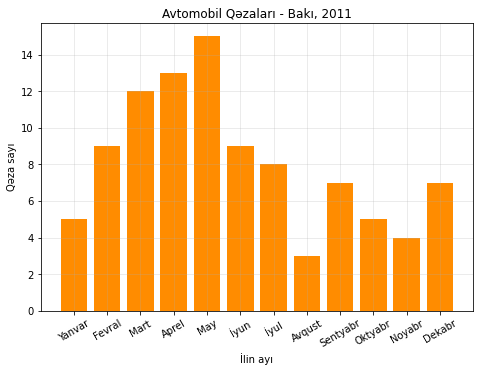

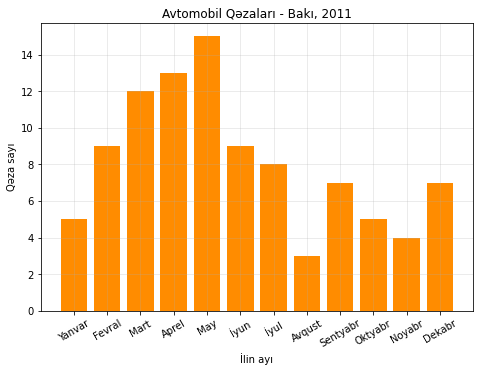

In [19]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

accidents = np.array([5, 9, 12, 13, 15, 9, 8, 3, 7, 5, 4, 7])
month_numbers = np.arange(12)
months = np.array(["Yanvar", "Fevral", "Mart", "Aprel", "May", "İyun", "İyul", "Avqust", "Sentyabr", "Oktyabr", "Noyabr", "Dekabr"])

ax.bar(month_numbers, accidents, align="center", color="darkorange")

ax.set_xticks(month_numbers)
ax.set_xticklabels(months, rotation=30)

ax.set_title("Avtomobil Qəzaları - Bakı, 2011")
ax.set_xlabel("İlin ayı")
ax.set_ylabel("Qəza sayı")
ax.grid(alpha=0.3)

#### savefig

Çəkdiyimiz qrafiki yaddaşda şəkil faylı kimi saxlamaq gələcəkdə qrafikin başqa məqsədlər üçün istifadəsini asanlaşdırır. Buna görə də, **savefig** methodu mövcuddur.

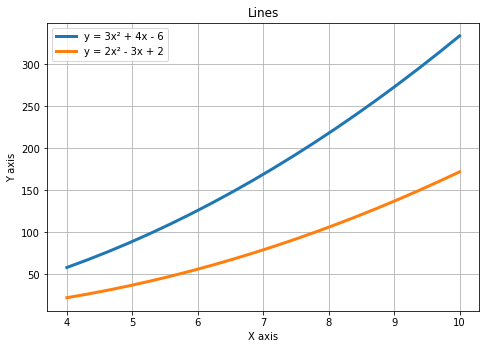

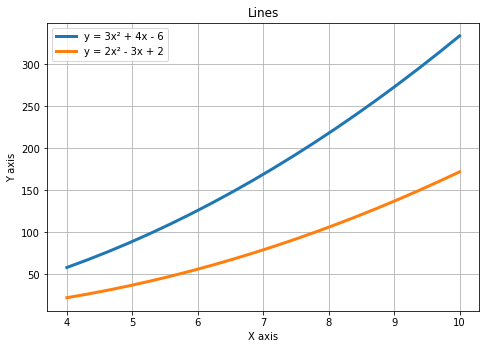

In [20]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

xs = np.linspace(4, 10, 20)

f1 = lambda x: 3 * x * x + 4 * x - 6
f2 = lambda x: 2 * x * x - 3 * x + 2

ys1 = f1(xs)
ys2 = f2(xs)

ax.plot(xs, ys1, lw=3, label="y = 3x² + 4x - 6")
ax.plot(xs, ys2, lw=3, label="y = 2x² - 3x + 2")

ax.legend()
ax.grid()
ax.set_title("Lines")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
fig.savefig("Lines.png", bbox_inches="tight")

## Yekun

Matplotlib modülünün bütün incəliklərini bir dəfəyə əhatə etmək mümkün olmasa da, ümid edirəm ki, əsas məqamları diqqətə çatdıra bildim. Yeni öyrənənlərə bu notebookda olan bütün konseptləri bir neçə dəfə oxumağı və ayrı bir Jupyter Notebookda test etməyi tövsiyə edirəm. Bütün konseptləri tam qavradığınıza əmin olduqdan sonra aşağıdakı GitHub linkində yerləşən çalışmalar tapa bilərsiniz.

https://github.com/hseysen/python/blob/master/modullar/matplotlib/Matplotlib_exercise.ipynb

Əgər yazılı izahlarda hər hansı bir çətinliyiniz olsa, aşağıdakı YouTube linkindən bu modül barədə olan dərsin videosuna baxa bilərsiniz. Videoda bu Jupyter Notebook üzərindən izah verirəm. Bu kimi dərslərin davamı üçün kanala abunə olub, videonu bəyənsəniz, minnətdar olaram.